# This notebook contains the Stacks parameter tests, final scripts used and analyses to identify sex linked markers for the ddRADseq dataset of <i>Lithobates pipiens</i> 
## Sample set:

### There are 12 populations in this data. . . they are described in the below paper:

O’Donnell, R.P. & Mock, K.E., 2012. Two frog species or one? A multi-marker approach to assessing the distinctiveness of genetic lineages in the Northern Leopard Frog, Rana pipiens. Conservation genetics , 13(5), pp.1167–1182.

The come from two lineages (LpipA is in the East of the US and LpipB is in the West). The paper above looks at whether or not these are two species or one. 

Below is the map of samples in our dataset (black) and all samples in the paper (grey)

In [2]:
%matplotlib inline
import os
import Incremental_U as IncU 
import Incremental_C as IncC
import Incremental_Pop_mod as IncPop
import MISC_RAD_tools as MISC
import pprint
import subprocess

In [2]:
%load_ext rpy2.ipython

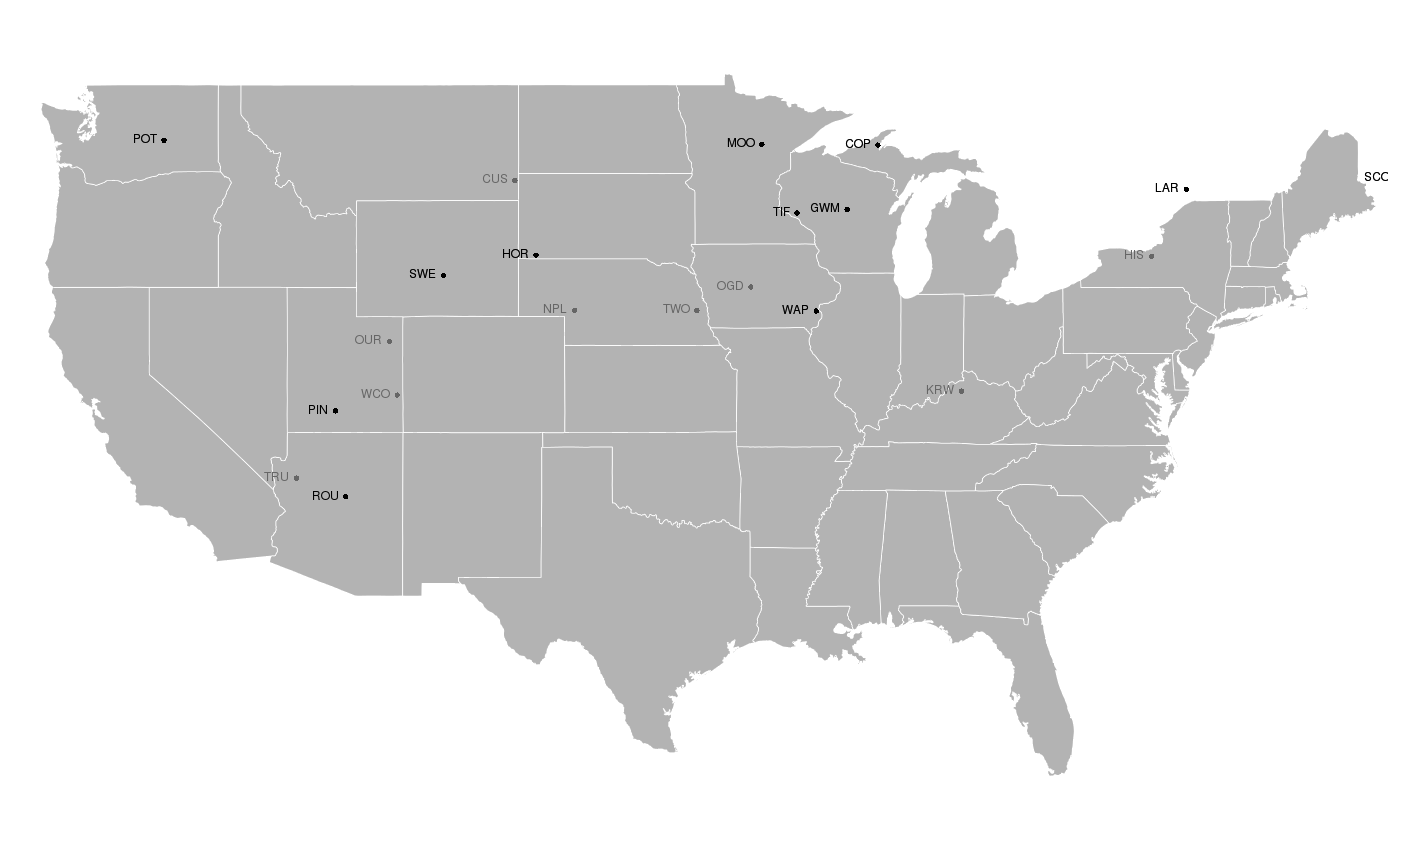

In [26]:
%%R -w 50 -h30 -u cm
library(maps)
library(mapplots)
library(mapdata)
library(calibrate)


map("state", col="gray70", fill=TRUE, border = "white")

coords <- read.delim("/home/djeffrie/Data/RADseq/Lpipiens/Sample_info/Pipiens_sample_coordinates.txt", header = F)
ourcoords <- read.delim("/home/djeffrie/Data/RADseq/Lpipiens/Sample_info/Pipiens_sample_coordinates_ours.txt", header = F)

names(coords) = c("Pop", "long", "lat")
names(ourcoords) = c("Pop", "long", "lat")

points(coords$long, coords$lat, pch = 16, col = "grey40")
textxy(coords$lon, coords$lat, coords$Pop, col = 'grey40', cex = 1, pos = 2)
points(ourcoords$long, ourcoords$lat, pch = 16, col = "black")
textxy(ourcoords$lon, ourcoords$lat, ourcoords$Pop, col = 'black', cex = 1, pos = 2)

In the paper, MOO, POT, PIN, ROU, SWE and HOR all belong to the "Western" haplogroup. 

LAR, GWM, SCO and COP belong to the Eastern group.

MOO, TIF,and WAP could have varying proportions of both lineages in them.

So, my strategy will be to plot out population structure, then to analyse all data together (which will likely not work), then to split the dataset down into population subsets based on the results in the paper and the population structure analyses. 

<b> relaxed populations command </b>

populations -b1 -M popmap.txt -P ./ -r 0.5 -p 1 --vcf -t 12 > Populations_relaxed.log 2>&1 & 

Running populations like this means that a locus has to be present in at least half the samples in at least 1 sex. We will have to be more strict with the final dataset. 

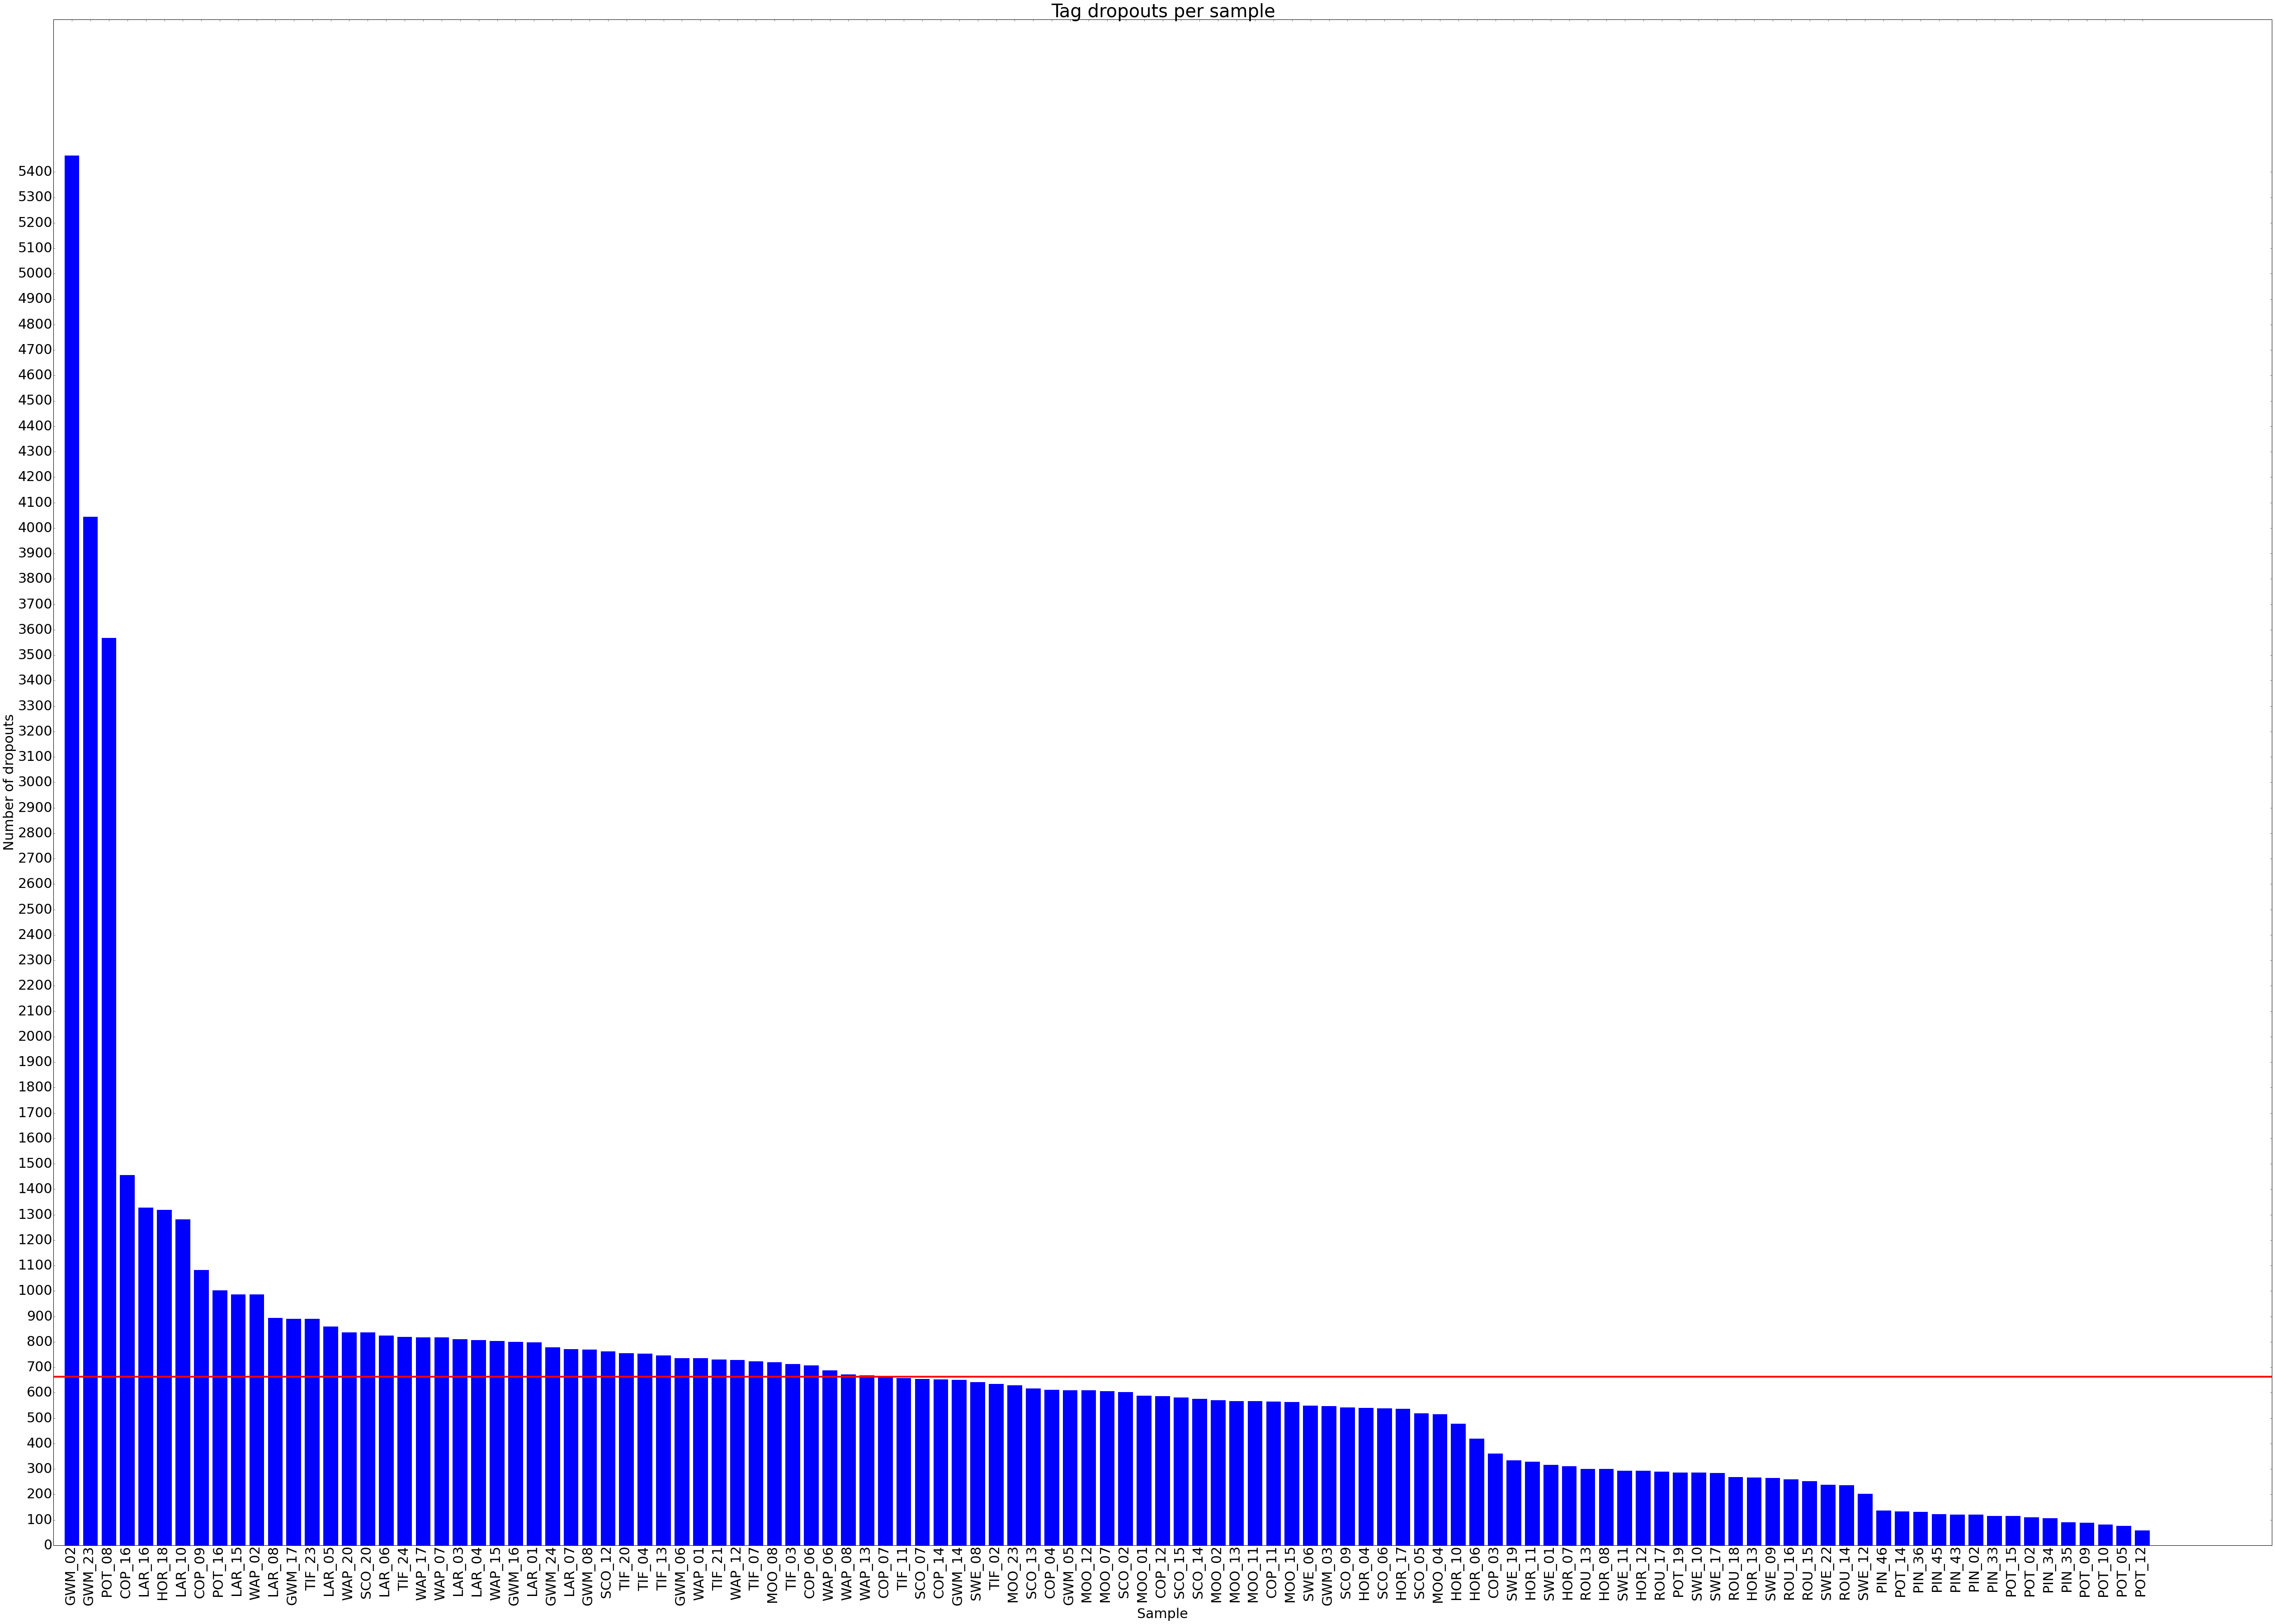

Outputs written to:
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks//blacklist.txt


In [4]:
wd = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/"

blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)

Removed GWM_02, 23 and POT_08

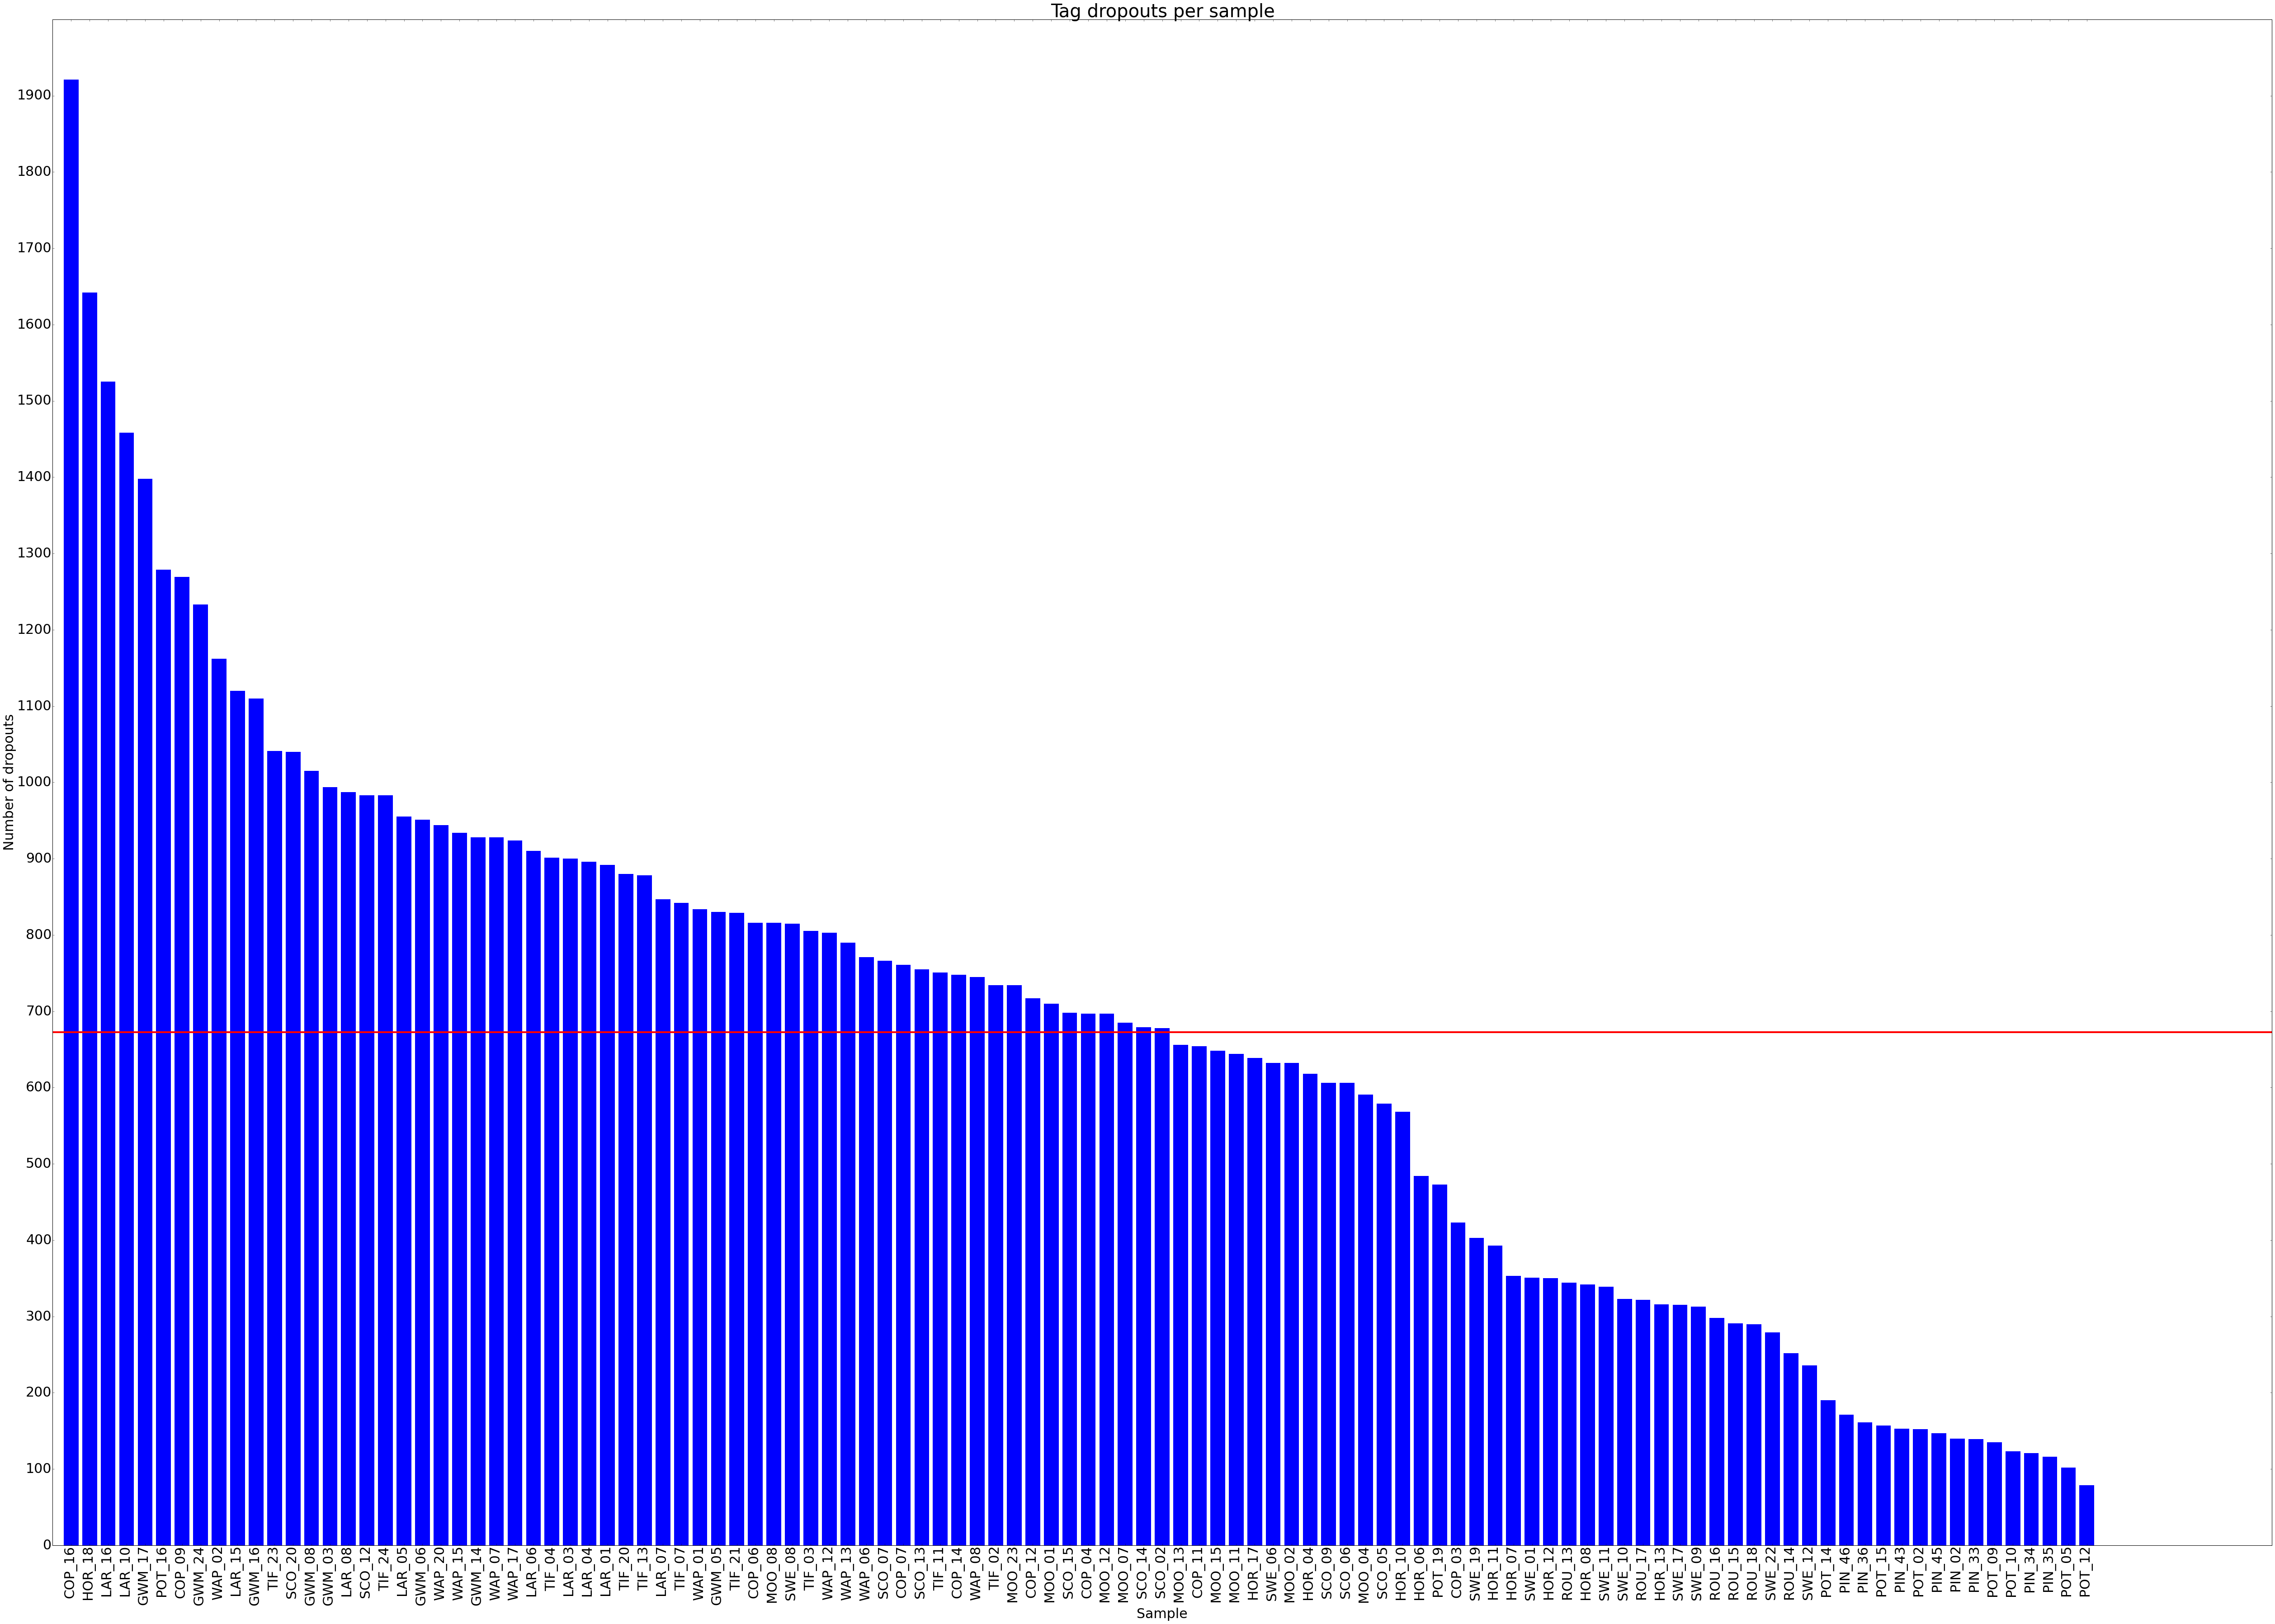

Outputs written to:
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Populations_all_kept//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Populations_all_kept//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Populations_all_kept//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Populations_all_kept//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Populations_all_kept//blacklist.txt


In [5]:
wd = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Populations_all_kept/"

blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)

Number of tags =  35335
Average tag coverage 23.7146581422 (+- 9.92879648259 )


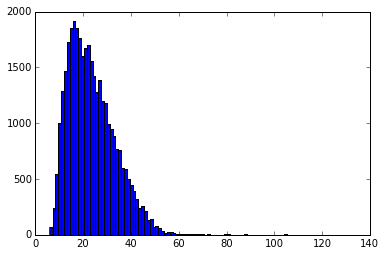

Mean sample coverage = 23.72 (+/2.02) 


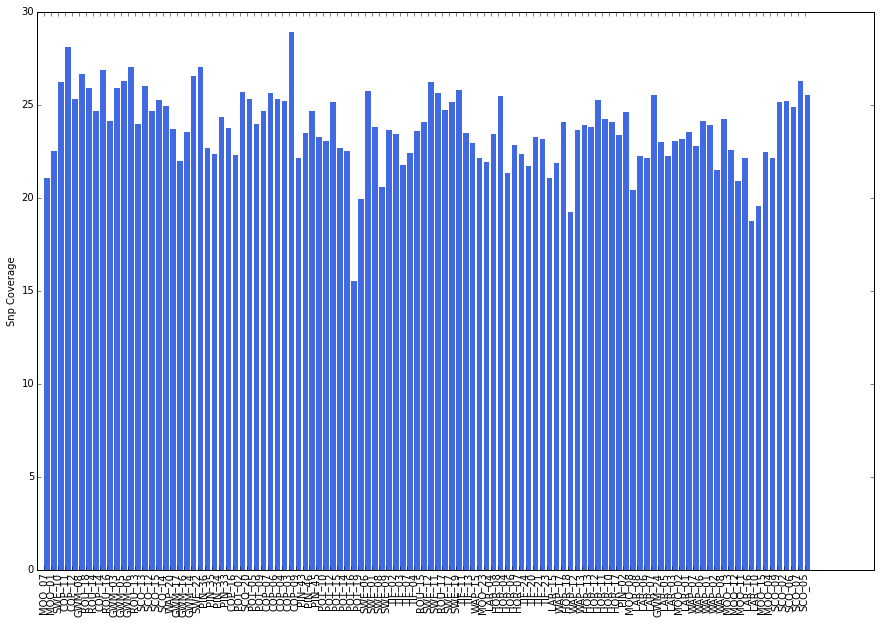

{'COP_03': [20,
  20,
  15,
  15,
  17,
  43,
  43,
  43,
  51,
  22,
  22,
  21,
  38,
  5,
  14,
  14,
  14,
  24,
  11,
  33,
  33,
  33,
  24,
  55,
  55,
  63,
  63,
  37,
  37,
  19,
  20,
  12,
  13,
  13,
  31,
  44,
  44,
  23,
  41,
  21,
  19,
  34,
  54,
  54,
  22,
  11,
  15,
  23,
  23,
  49,
  13,
  47,
  35,
  16,
  16,
  19,
  16,
  48,
  48,
  11,
  11,
  40,
  40,
  55,
  55,
  55,
  23,
  23,
  23,
  27,
  27,
  21,
  35,
  35,
  55,
  47,
  45,
  45,
  45,
  37,
  65,
  65,
  65,
  17,
  39,
  39,
  24,
  24,
  24,
  24,
  77,
  77,
  77,
  8,
  54,
  54,
  29,
  90,
  90,
  90,
  19,
  37,
  56,
  56,
  39,
  60,
  60,
  26,
  26,
  43,
  45,
  18,
  51,
  51,
  9,
  9,
  37,
  37,
  27,
  49,
  49,
  49,
  19,
  35,
  23,
  23,
  19,
  27,
  51,
  44,
  44,
  22,
  22,
  23,
  14,
  14,
  16,
  45,
  16,
  27,
  27,
  11,
  11,
  39,
  46,
  46,
  17,
  17,
  27,
  27,
  31,
  38,
  26,
  26,
  47,
  47,
  40,
  40,
  68,
  68,
  68,
  27,
  34,
  34,
  42,
  60

In [3]:
wd = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Populations_all_kept/"
final_vcf = "%s/batch_1.vcf" % wd
MISC.av_tag_cov(final_vcf, "%s/Av_tag_cov.out" % wd)
#MISC.sample_Avcov_from_vcf(final_vcf)

### Now run a PCA to look at the structure in the data . . . 

In [6]:
%%bash

wd=/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Populations_all_kept/  ## just change this line

## All data 
sed 's/_/-/g' $wd/batch_1.vcf > $wd/batch_1_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/batch_1_altered_adegenet_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Populations_all_kept//batch_1_altered_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Populations_all_kept//batch_1_altered_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Populations_all_kept//batch_1_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Populations_all_kept//batch_1_altered_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Populations_all_kept//batch_1_altered_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Populations_all_kept//batch_1_altered_adegenet_plink-temporary.fam
written.
35335

In [7]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Populations_all_kept/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('batch_1_altered_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("../popmap_kept.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 


/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: ade4

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
   /// adegenet 2.0.1 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()



  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



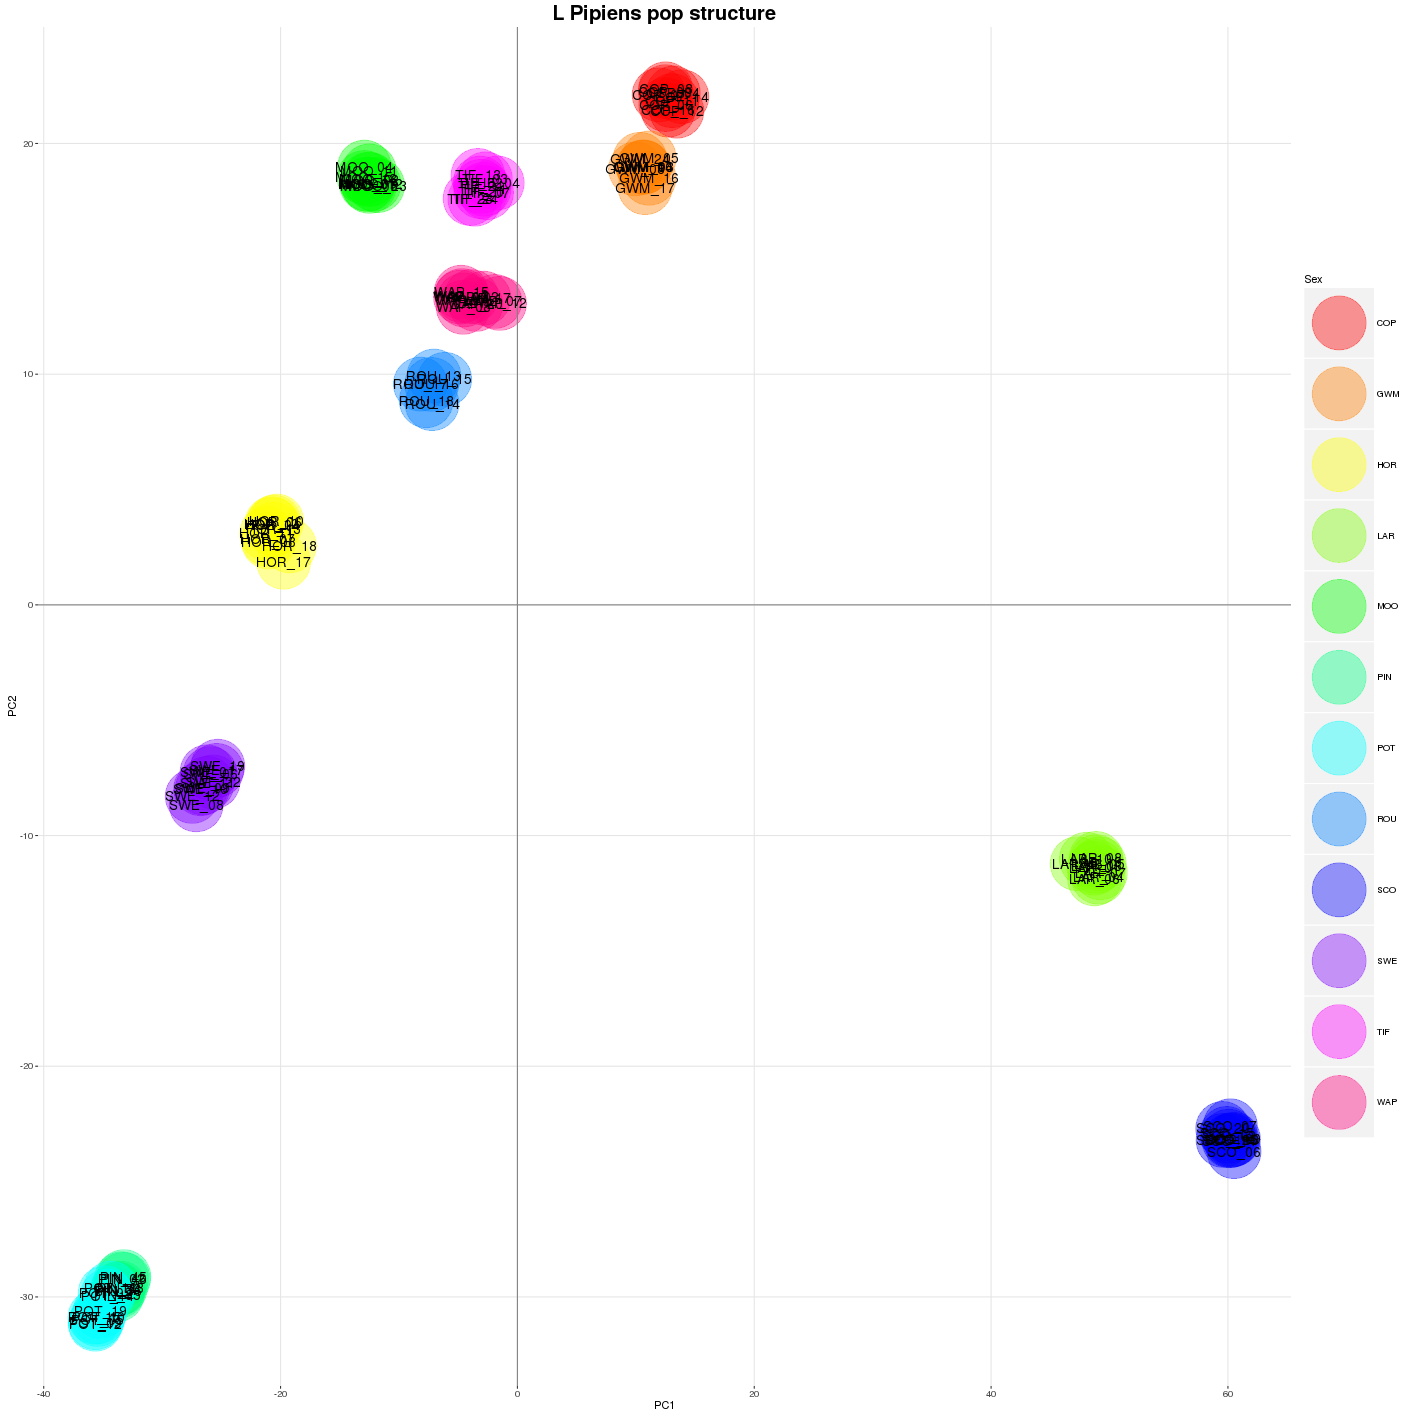

In [9]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "L Pipiens pop structure", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = rainbow(12), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

So there is clearly quite a lot of structure in this dataset. Which could cause some problems for identifying sex linked markers if there are lots of haplotypes floating around. . . .  lets see

In [12]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "//home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Populations_all_kept/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Sex_ID_info_kept_certain.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 35335
Number of samples = 110
Number of loci with too few samples = 1179
Number of loci with low MAF = 0
Number of loci with enough data = 34155
Number of putative X linked snps = 0
Number of putative X linked tags = 0
Number of putative Z linked markers = 0
Number of putative Z linked tags = 0


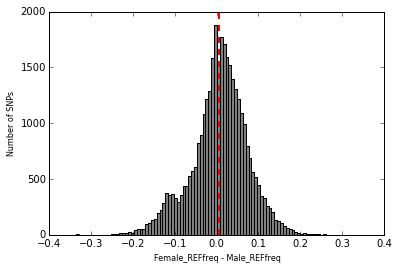


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 35335
Number of samples = 110
Number of loci with too few samples = 1179
Number of loci with low MAF = 0
Number of loci with enough data = 34155
Number of putative X linked snps = 0
Number of putative X linked tags = 0
Number of putative Z linked markers = 0
Number of putative Z linked tags = 0

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of males: 48
Number of males: 41
Number of Putative Y linked tags: 0
Number of Putative W linked tags: 0

 ### DONE! ###


 ## After merging tags accross methods ## 

Final number of XY tags = 0
Final number of ZW tags = 0
Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory //home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks


/home/djeffrie/anaconda/lib/python2.7/site-packages/matplotlib_venn/_venn3.py:46: UserWarning: All circles have zero area
  warnings.warn("All circles have zero area")


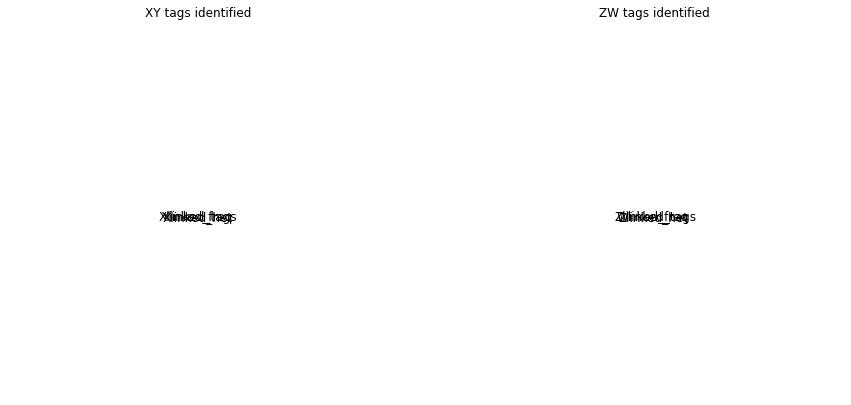

In [13]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

### Splitting populations into subsets. . . and finding sex linked markers using the 3 approaches in Brelsford & Lavanchy et al (2016)

So unsurprisingly, there are no sex linked markers found when looking at all of the data together. 

So now split into the two lineages described in the paper:

### "Eastern Lineage"

LAR  
GWM  
SCO  
COP

This subset comprises 12 Females and 16 Males


Number of tags =  64330
Average tag coverage 22.5374530879 (+- 11.1548273786 )


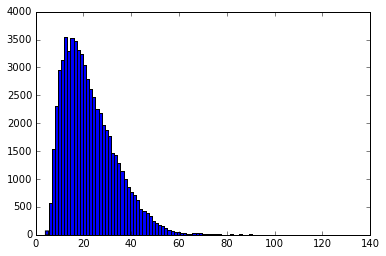

In [6]:
wd = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Eastern_lineage_populations/"
final_vcf = "%s/batch_1.vcf" % wd
MISC.av_tag_cov(final_vcf, "%s/Av_tag_cov.out" % wd)
#MISC.sample_Avcov_from_vcf(final_vcf)

In [18]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "//home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Eastern_lineage_populations/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Eastern_lineage_populations/Sex_ID_info_Eastern_kept_certain.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 64330
Number of samples = 28
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 64329
Number of putative X linked snps = 108
Number of putative X linked tags = 108
Number of putative Z linked markers = 19
Number of putative Z linked tags = 19


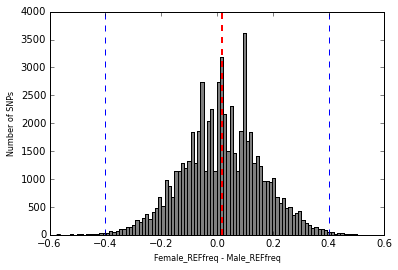


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 64330
Number of samples = 28
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 64329
Number of putative X linked snps = 22
Number of putative X linked tags = 22
Number of putative Z linked markers = 21
Number of putative Z linked tags = 21

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 12
Number of males: 16
Number of Putative Y linked tags: 25
Number of Putative W linked tags: 1

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory //home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks

 ## After merging tags accross methods ## 

Final number of XY tags = 153
Final number of ZW tags = 41


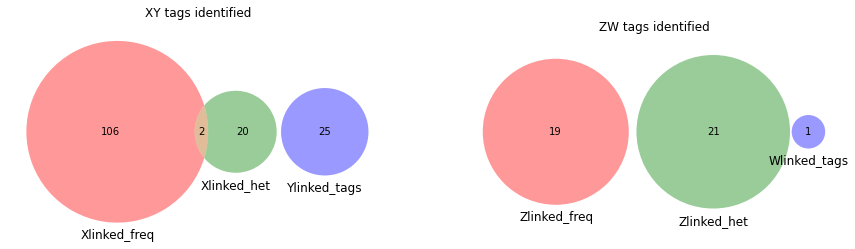

In [19]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

Now visualising these on a PCA . . .

In [20]:
vcf_path = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Eastern_lineage_populations/batch_1.vcf"

MISC.filter_vcf(vcf_path, XYset , "XY_linked_snps_freq_het.vcf")

In [21]:
%%bash

wd=/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Eastern_lineage_populations/  ## just change this line

## XY only data 
sed 's/_/-/g' $wd/XY_linked_snps_freq_het.vcf > $wd/XY_linked_snps_freq_het_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/XY_linked_snps_freq_het_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/XY_linked_snps_freq_het_altered_adegenet 

PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Eastern_lineage_populations//XY_linked_snps_freq_het_altered_adegenet.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Eastern_lineage_populations//XY_linked_snps_freq_het_altered_adegenet
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Eastern_lineage_populations//XY_linked_snps_freq_het_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Eastern_lineage_populations//XY_linked_snps_freq_het_altered_adegenet-temporary.bed
+
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Eastern_lineage_populations//XY_linked_snps_freq_het_altered_adegenet-temporary.bim
+
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_a

In [24]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.R")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Eastern_lineage_populations/") 

## All SNPs (about 80,000)
XYdata <- read.PLINK('XY_linked_snps_freq_het_altered_adegenet.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("Sex_ID_info_Eastern_kept_certain.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca2 <- glPca(XYdata, parallel = TRUE, n.cores = 2, nf = 5) 


/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



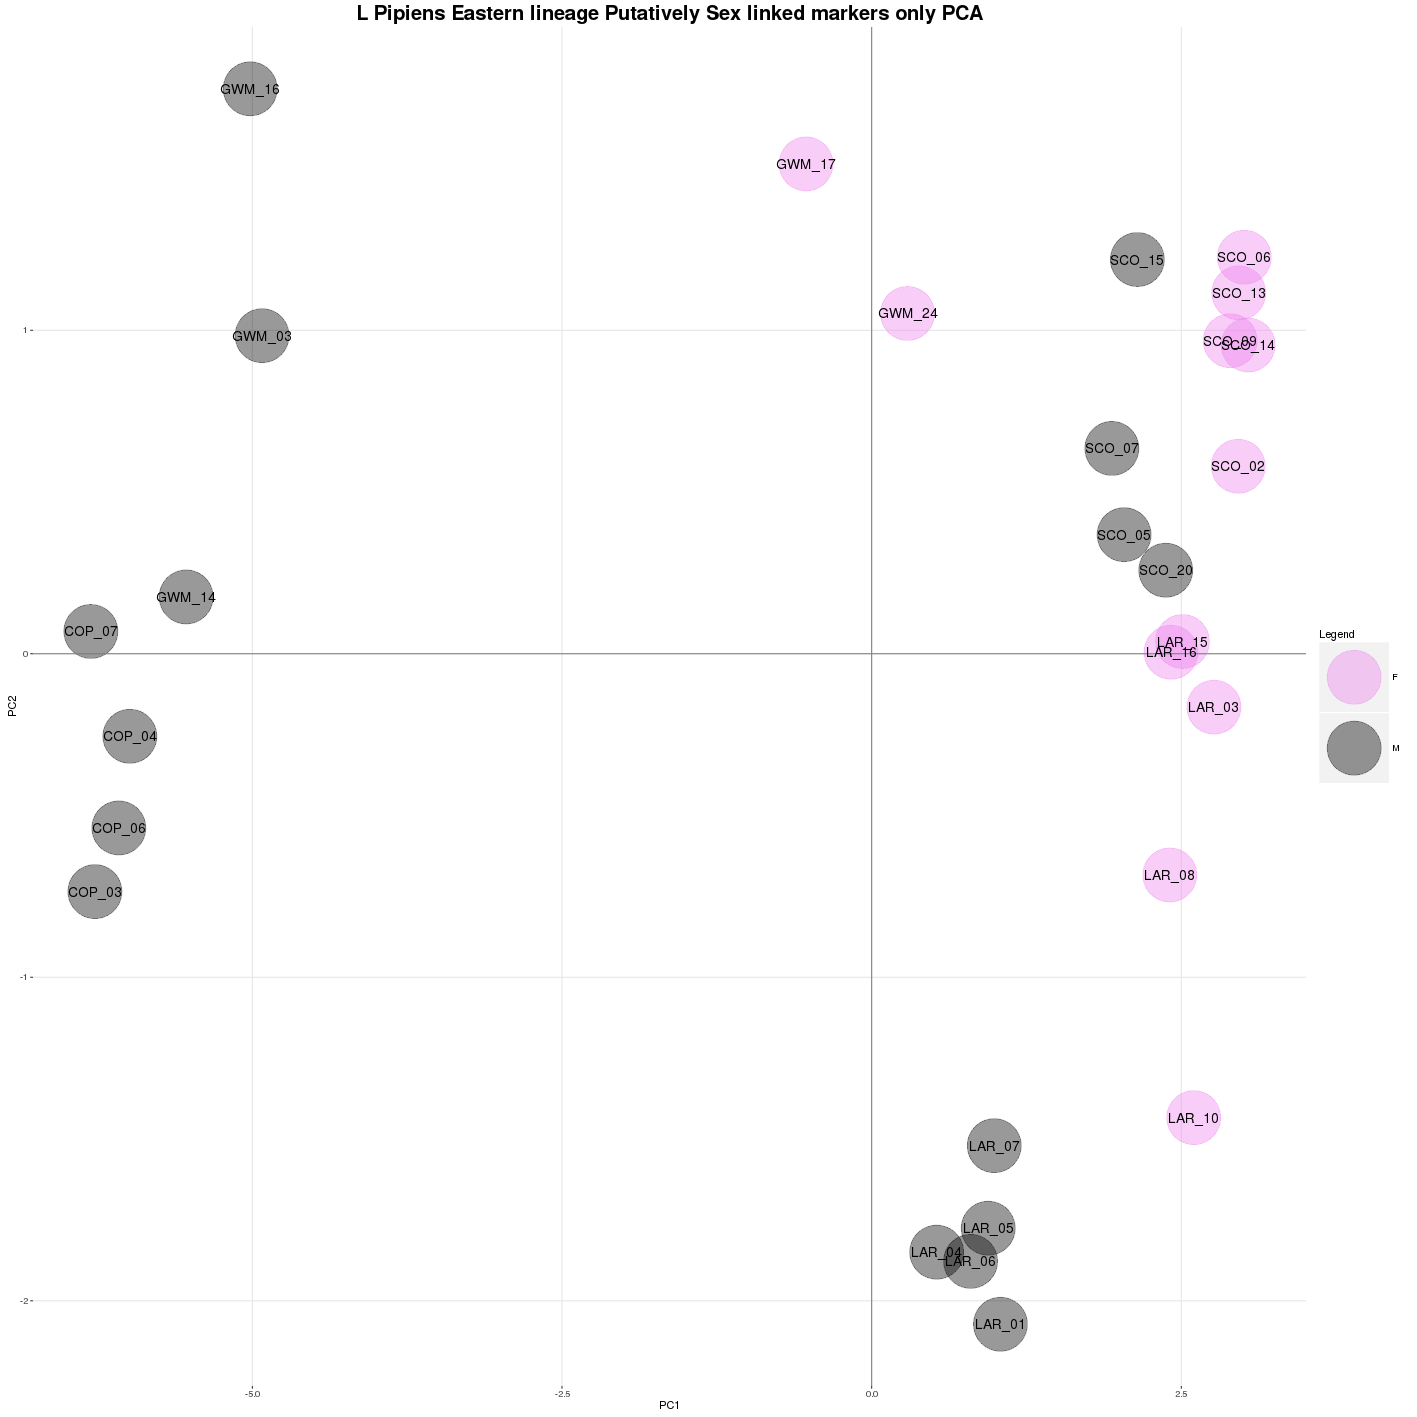

In [28]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca2,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "L Pipiens Eastern lineage Putatively Sex linked markers only PCA", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

So I can't find anything consistent in this Eastern lineage, although Guilluame found 31 markers here. Maybe try to look at a few pairwise combo's.  

### LAR & SCO

In [5]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "//home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/LAR_SCO_populations/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/LAR_SCO_populations/Sex_ID_info_LAR_SCO_kept_certain.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.5 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.7 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.


In [6]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "010")


##### Using SNP heterozygosity approach #####
 
Number of loci = 52351
Number of samples = 19
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 52350
Number of putative X linked snps = 105
Number of putative X linked tags = 105
Number of putative Z linked markers = 124
Number of putative Z linked tags = 124

 ### DONE! ### 

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory //home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks

 ## After merging tags accross methods ## 

Final number of XY tags = 105
Final number of ZW tags = 124


In [133]:
vcf_path = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/LAR_SCO_populations/batch_1.vcf"

MISC.filter_vcf(vcf_path, XYset , "XY_linked_snps_freq_het.vcf")

In [134]:
%%bash

wd=/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/LAR_SCO_populations/  ## just change this line

## XY only data 
sed 's/_/-/g' $wd/XY_linked_snps_freq_het.vcf > $wd/XY_linked_snps_freq_het_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/XY_linked_snps_freq_het_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/XY_linked_snps_freq_het_altered_adegenet 

PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/LAR_SCO_populations//XY_linked_snps_freq_het_altered_adegenet.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/LAR_SCO_populations//XY_linked_snps_freq_het_altered_adegenet
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/LAR_SCO_populations//XY_linked_snps_freq_het_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/LAR_SCO_populations//XY_linked_snps_freq_het_altered_adegenet-temporary.bed
+
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/LAR_SCO_populations//XY_linked_snps_freq_het_altered_adegenet-temporary.bim
+
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/LAR_SCO_populations//XY_linked

In [135]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/LAR_SCO_populations/") 

## All SNPs (about 80,000)
XYdata <- read.PLINK('XY_linked_snps_freq_het_altered_adegenet.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("Sex_ID_info_LAR_SCO_kept_certain.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca2 <- glPca(XYdata, parallel = TRUE, n.cores = 2, nf = 5) 



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



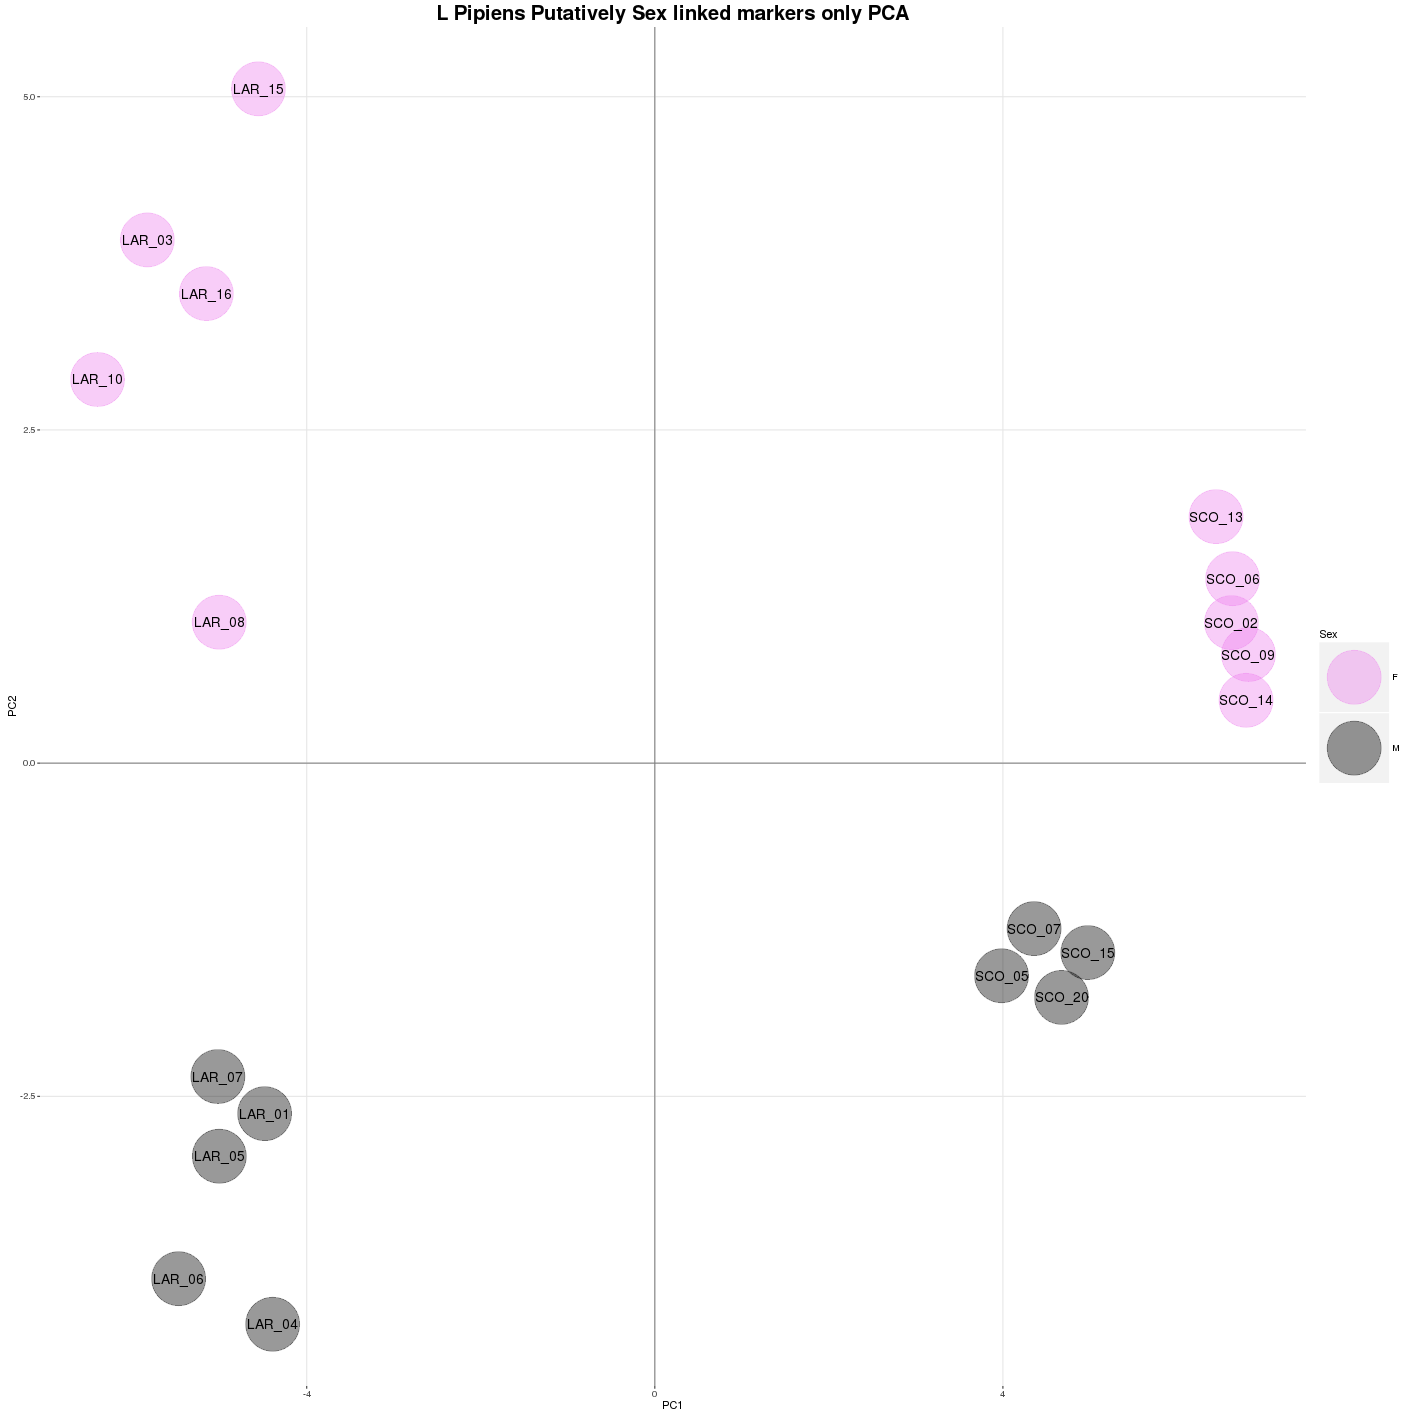

In [136]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca2,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "L Pipiens Putatively Sex linked markers only PCA", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

In [137]:
%%bash
sh /home/djeffrie/Dropbox/My_Dropbox_Scripts/Bash/Make_heatmap_input.sh  /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/LAR_SCO_populations/XY_linked_snps_freq_het_altered_adegenet.raw  /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/LAR_SCO_populations/XY_linked_western_lin_heatmap_input.raw


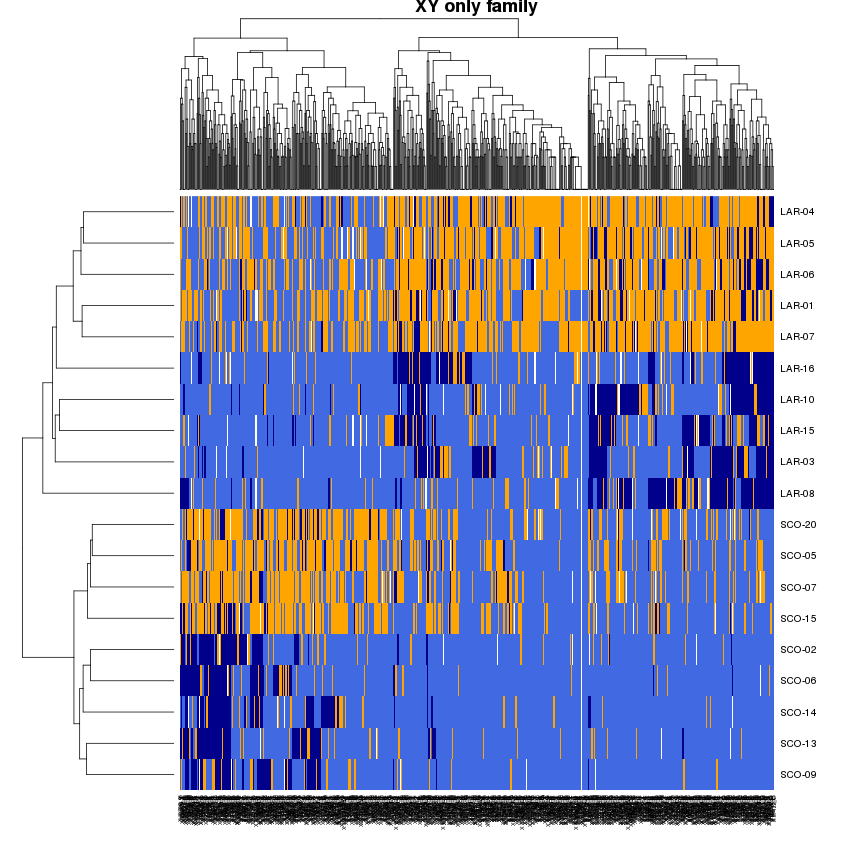

In [138]:
%%R -w 30 -h 30 -u cm

XY_heatmap_data <- read.delim("/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/LAR_SCO_populations/XY_linked_western_lin_heatmap_input.raw.raw", row.names = 1)
XY_heatmap_data_sorted <- XY_heatmap_data[order(row.names(XY_heatmap_data), decreasing = T), ]
XY_heatmap_data_datmat <- as.matrix(XY_heatmap_data_sorted)

heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "XY only family")


### "Western Group"

MOO  
POT  
PIN  
ROU  
SWE  
HOR

26 females, 20 males

In [129]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "//home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations/Sex_ID_info_western_kept_certain.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 0.8 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 0.8 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.5 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 44544
Number of samples = 46
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 44543
Number of putative X linked snps = 4
Number of putative X linked tags = 4
Number of putative Z linked markers = 11
Number of putative Z linked tags = 11


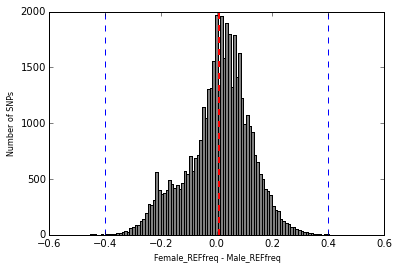


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 44544
Number of samples = 46
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 44543
Number of putative X linked snps = 215
Number of putative X linked tags = 215
Number of putative Z linked markers = 5
Number of putative Z linked tags = 5

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 26
Number of males: 20
Number of Putative Y linked tags: 0
Number of Putative W linked tags: 1

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory //home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks

 ## After merging tags accross methods ## 

Final number of XY tags = 219
Final number of ZW tags = 17


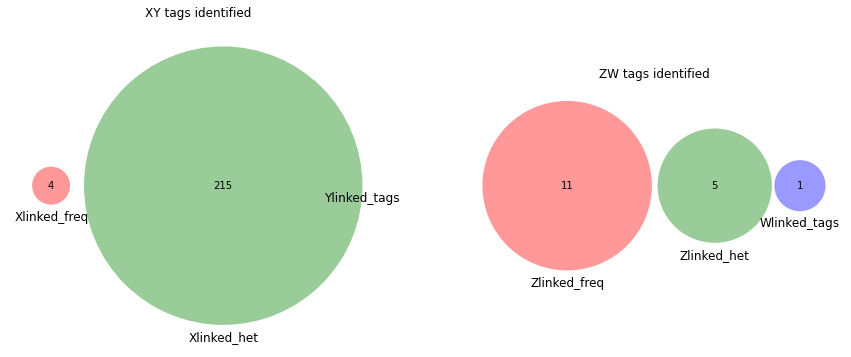

In [130]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

So, there are some identified by the heterozygosity approach, which is perhaps a good sign as there a quite a few males, so likelihood of false poisitives here is not that high. I can plot the samples out at these loci and see how they fall and try to see If there are some missassignments.

In [123]:
vcf_path = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations/batch_1.vcf"

MISC.filter_vcf(vcf_path, XYset , "XY_linked_snps_freq_het.vcf")

In [124]:
%%bash

wd=/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations/  ## just change this line

## XY only data 
sed 's/_/-/g' $wd/XY_linked_snps_freq_het.vcf > $wd/XY_linked_snps_freq_het_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/XY_linked_snps_freq_het_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/XY_linked_snps_freq_het_altered_adegenet 

PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations//XY_linked_snps_freq_het_altered_adegenet.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations//XY_linked_snps_freq_het_altered_adegenet
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations//XY_linked_snps_freq_het_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations//XY_linked_snps_freq_het_altered_adegenet-temporary.bed
+
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations//XY_linked_snps_freq_het_altered_adegenet-temporary.bim
+
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_a

In [127]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.R")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations/") 

## All SNPs (about 80,000)
XYdata <- read.PLINK('XY_linked_snps_freq_het_altered_adegenet.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("Sex_ID_info_western_kept_certain.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca2 <- glPca(XYdata, parallel = TRUE, n.cores = 2, nf = 5) 



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



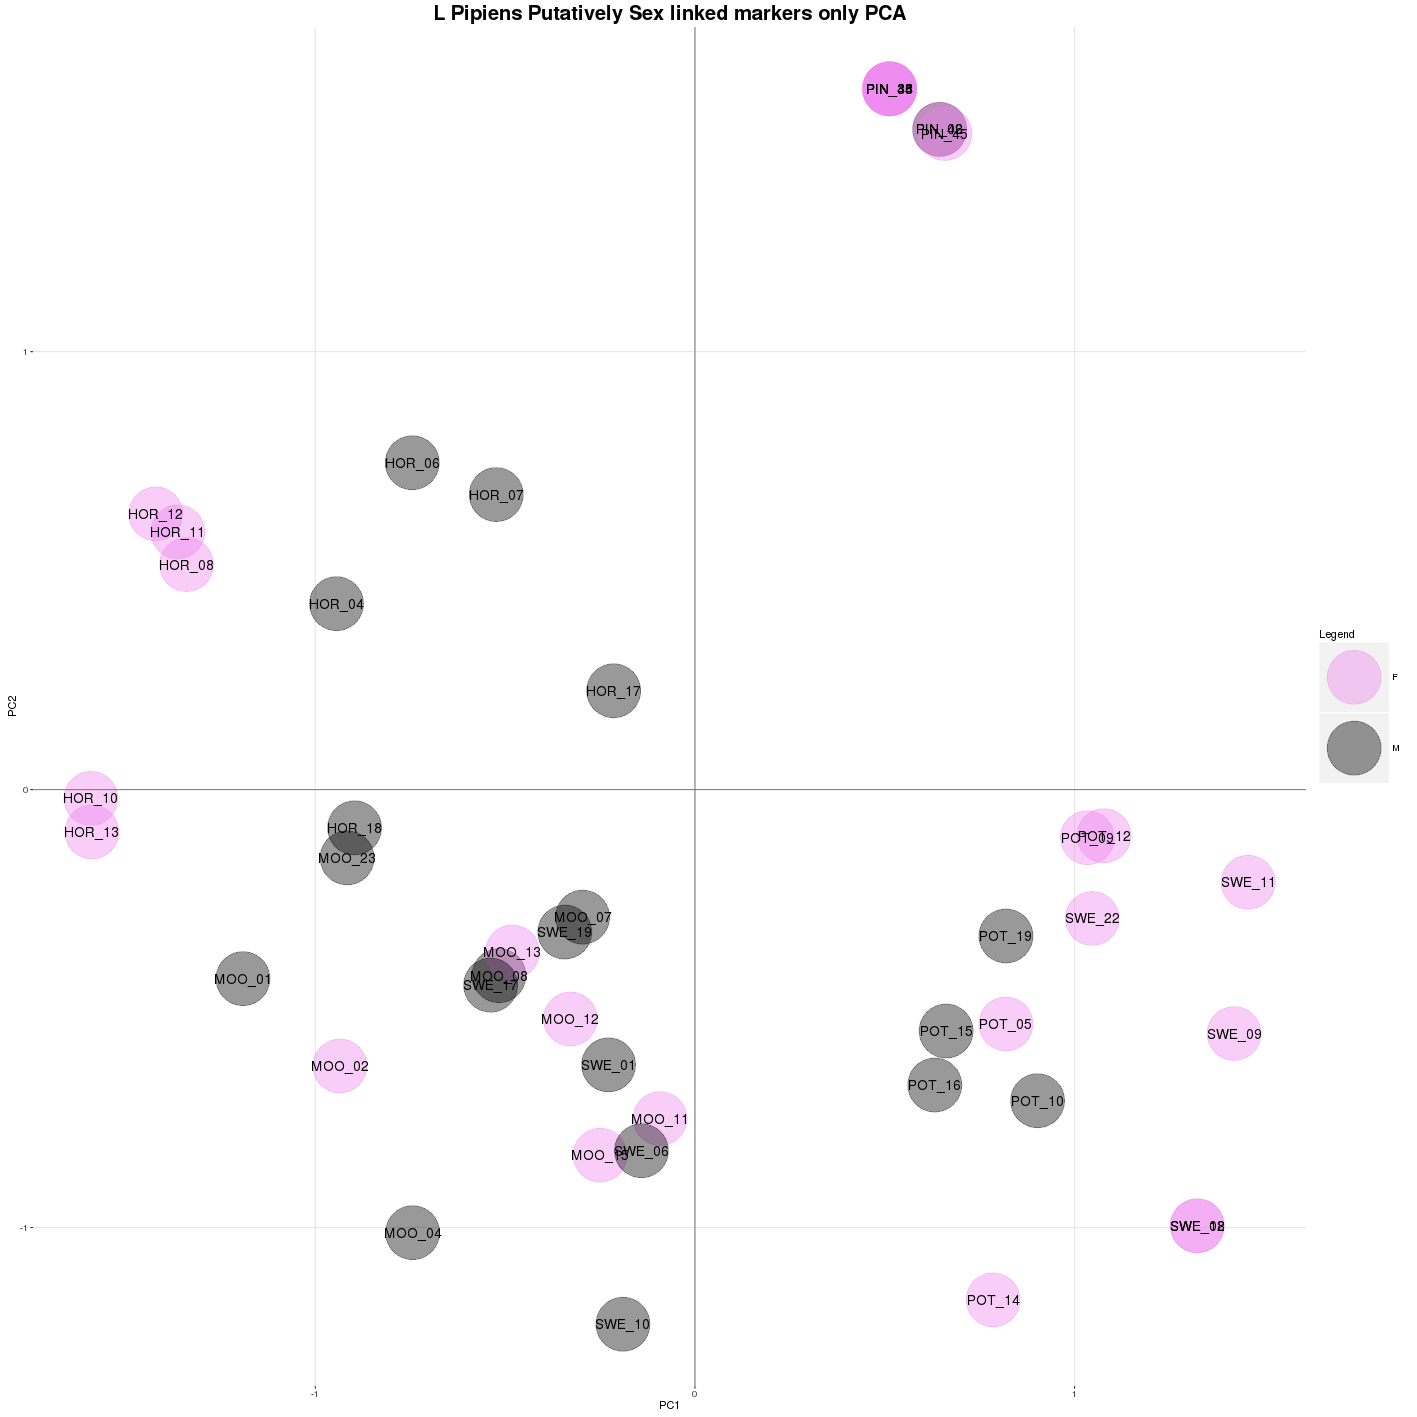

In [128]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca2,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "L Pipiens Putatively Sex linked markers only PCA", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

Ok, so this is just driven by the PIN/POT pops being so divergent. Remove these and try again. . . 

This leaves populations:

HOR  
MOO  
SWE

15 males, 15 females

Number of tags =  47321
Average tag coverage 21.7029275234 (+- 11.2212904153 )


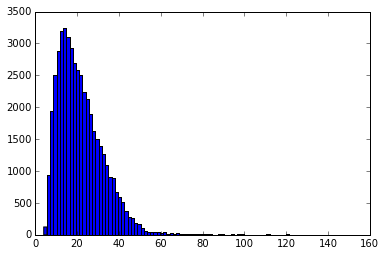

In [5]:
wd = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations_noPINPOT/"
final_vcf = "%s/batch_1.vcf" % wd
MISC.av_tag_cov(final_vcf, "%s/Av_tag_cov.out" % wd)
#MISC.sample_Avcov_from_vcf(final_vcf)

In [3]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations_noPINPOT/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations_noPINPOT/Sex_ID_info_western_kept_certain.txt"

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 47321
Number of samples = 30
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 47320
Number of putative X linked snps = 20
Number of putative X linked tags = 20
Number of putative Z linked markers = 7
Number of putative Z linked tags = 7


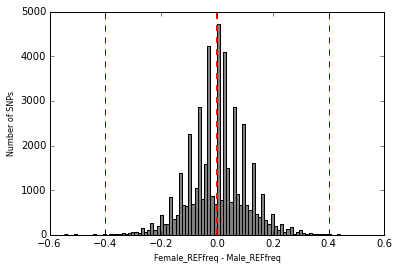


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 47321
Number of samples = 30
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 47320
Number of putative X linked snps = 31
Number of putative X linked tags = 31
Number of putative Z linked markers = 5
Number of putative Z linked tags = 5

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 15
Number of males: 15
Number of Putative Y linked tags: 14
Number of Putative W linked tags: 2

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks

 ## After merging tags accross methods ## 

Final number of XY tags = 61
Final number of ZW tags = 14


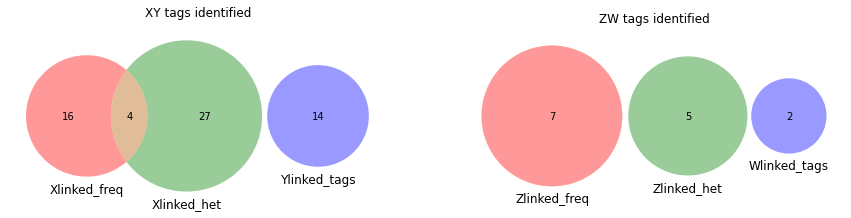

In [4]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

In [48]:
vcf_path = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations_noPINPOT/batch_1.vcf"

MISC.filter_vcf(vcf_path, XYset , "XY_linked_snps_freq_het.vcf")

In [49]:
%%bash

wd=/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations_noPINPOT/  ## just change this line

## XY only data 
sed 's/_/-/g' $wd/XY_linked_snps_freq_het.vcf > $wd/XY_linked_snps_freq_het_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/XY_linked_snps_freq_het_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/XY_linked_snps_freq_het_altered_adegenet 

PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations_noPINPOT//XY_linked_snps_freq_het_altered_adegenet.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations_noPINPOT//XY_linked_snps_freq_het_altered_adegenet
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations_noPINPOT//XY_linked_snps_freq_het_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations_noPINPOT//XY_linked_snps_freq_het_altered_adegenet-temporary.bed
+
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations_noPINPOT//XY_linked_snps_freq_het_altered_adegenet-temporary.bim

In [50]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations_noPINPOT/") 

## All SNPs (about 80,000)
XYdata <- read.PLINK('XY_linked_snps_freq_het_altered_adegenet.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("Sex_ID_info_western_kept_certain.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca2 <- glPca(XYdata, parallel = TRUE, n.cores = 2, nf = 5) 



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



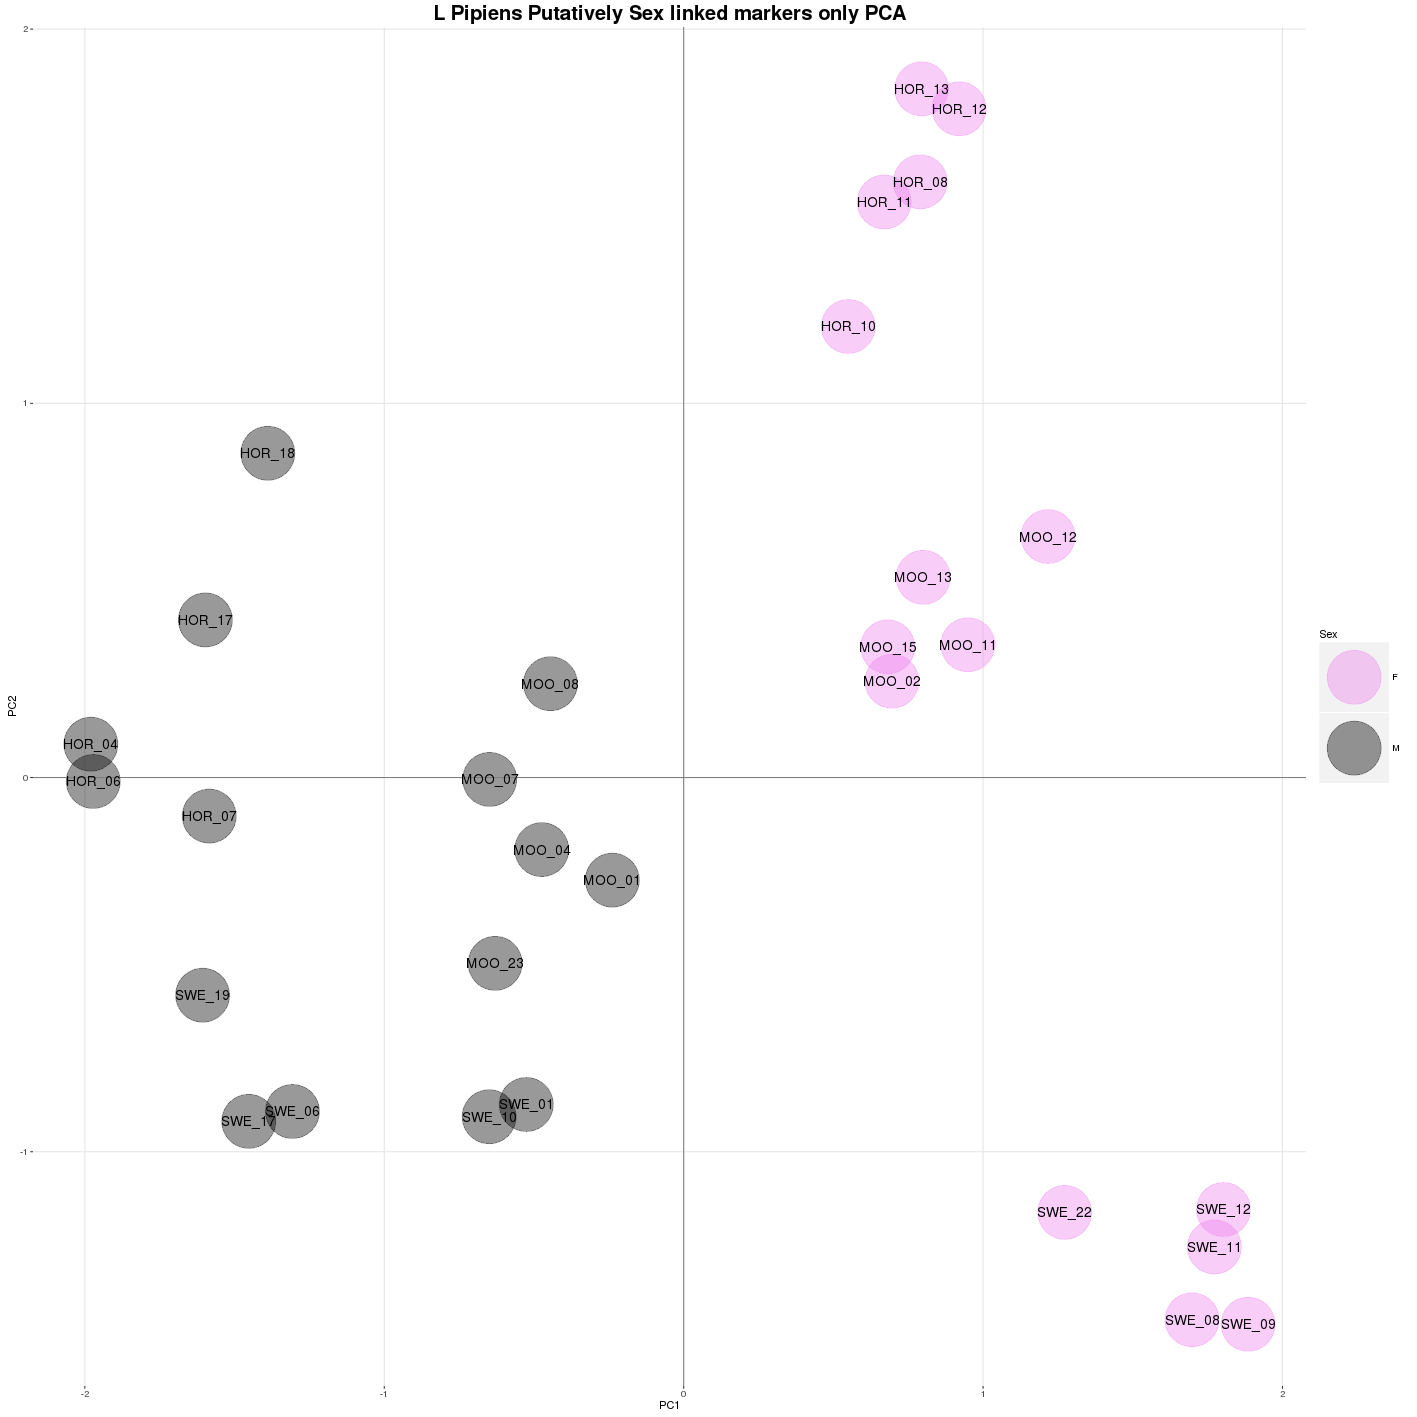

In [51]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca2,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "L Pipiens Putatively Sex linked markers only PCA", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

Ok, so we may have some markers here. Not the strongest signal, and a few false positives, but not bad. Clearly some differences between males in different populations though. 

Heatmap will visualise this better. . . 

In [61]:
%%bash
sh /home/djeffrie/Dropbox/My_Dropbox_Scripts/Bash/Make_heatmap_input.sh  /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations_noPINPOT/XY_linked_snps_freq_het_altered_adegenet.raw  /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations_noPINPOT/XY_linked_western_lin_heatmap_input.raw

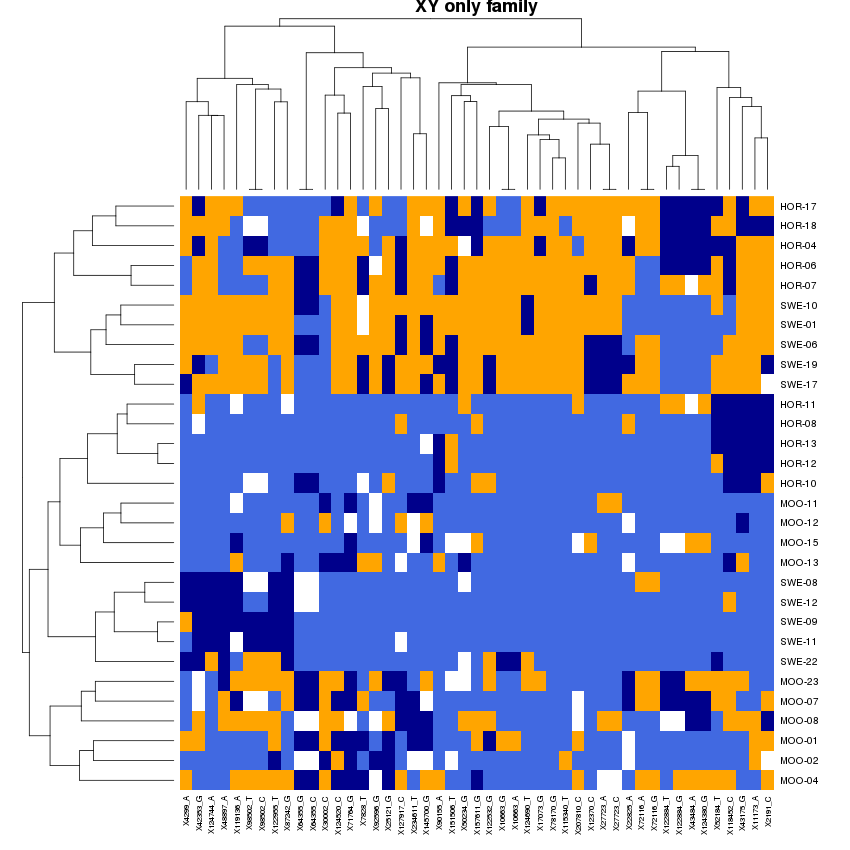

In [62]:
%%R -w 30 -h 30 -u cm

XY_heatmap_data <- read.delim("/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations_noPINPOT/XY_linked_western_lin_heatmap_input.raw.raw", row.names = 1)
XY_heatmap_data_sorted <- XY_heatmap_data[order(row.names(XY_heatmap_data), decreasing = T), ]
XY_heatmap_data_datmat <- as.matrix(XY_heatmap_data_sorted)

heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "XY only family")


It seems that HOR and SWE are the closest in their "putative" sex linked haplotypes. So I will try these populations on their own, in order to increase power to detect SL markers. 

In [1]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/HOR_SWE_populations/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/HOR_SWE_populations/Sex_ID_info_kept_certain.txt"

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 41107
Number of samples = 20
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 41106
Number of putative X linked snps = 155
Number of putative X linked tags = 155
Number of putative Z linked markers = 56
Number of putative Z linked tags = 56


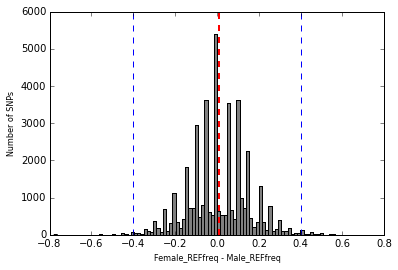


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 41107
Number of samples = 20
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 41106
Number of putative X linked snps = 295
Number of putative X linked tags = 295
Number of putative Z linked markers = 64
Number of putative Z linked tags = 64

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of males: 10
Number of males: 10
Number of Putative Y linked tags: 108
Number of Putative W linked tags: 31

 ### DONE! ###


 ## After merging tags accross methods ## 

Final number of XY tags = 525
Final number of ZW tags = 148
Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks


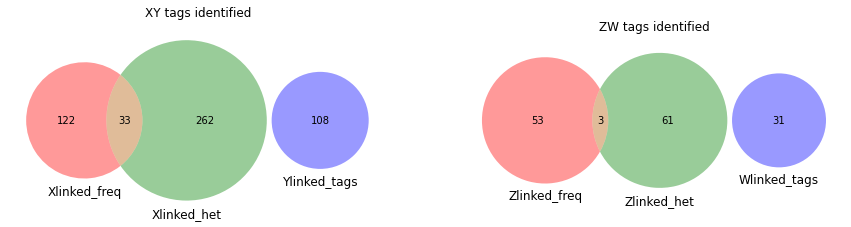

In [64]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

This looks much more promising, so now I can make the parameters more stringent to get rid of false positives. 


##### Using SNP frequency approach #### 

Number of loci = 41107
Number of samples = 20
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 41106
Number of putative X linked snps = 79
Number of putative X linked tags = 79
Number of putative Z linked markers = 23
Number of putative Z linked tags = 23


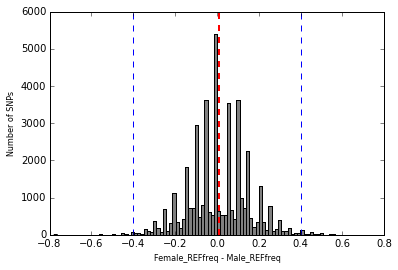


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 41107
Number of samples = 20
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 41106
Number of putative X linked snps = 21
Number of putative X linked tags = 21
Number of putative Z linked markers = 1
Number of putative Z linked tags = 1

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of males: 10
Number of males: 10
Number of Putative Y linked tags: 24
Number of Putative W linked tags: 5

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks

 ## After merging tags accross methods ## 

Final number of XY tags = 112
Final number of ZW tags = 28


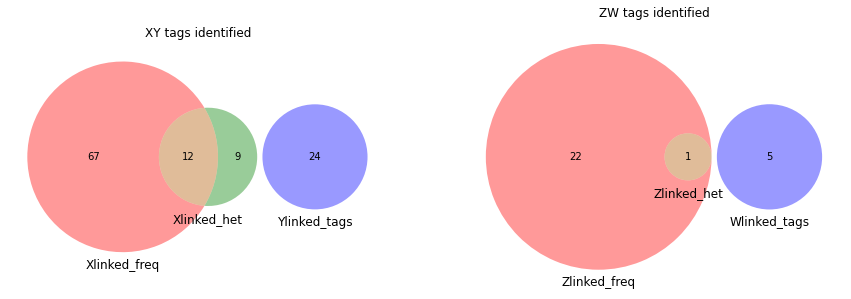

In [5]:

# 1. Frequency approach
Parameter_dict['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.8 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.7 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

In [12]:
whitelist = open("/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/whitelist.txt", 'w')

for i in XYset:
    whitelist.write("%s\n" % i)

whitelist.close()
#MISC.fasta_maka(XYset, Parameter_dict['Catalog'])

In [21]:
print len(set([i.split()[0] for i in XYset]))

112


In [36]:
def fasta_maka(whitey, cat):

    """
    whitey = whitelist containing locus IDs in the form of "<Tag_ID>_<Position>"
    cat    = path to the catalog file to get sequences from

    """


    loci = open(whitey, 'r').readlines()

    if cat.endswith("gz"):
        tags = gzip.open(cat, 'r').readlines()
    else:
        tags = open(cat, 'r').readlines()

    ## Pull out the locus ID's from the whitelist

    Loc_IDs = []
    for locus in loci:
        locus = locus.strip("\n")
        if locus.startswith("compli"):
            Loc_id = locus.split("_")[1].strip()
        else:
            Loc_id = locus.split("_")[0].strip()
        Loc_IDs.append(Loc_id)
    print Loc_IDs
    print "Number of tags in whitelist:",len(Loc_IDs)

    ## Write the fasta

    fasta = open("%s/%s" % (cat.rpartition('/')[0], '/Whitelist_tags.fa'), 'w')

    count = 0
    for line in tags:
        if 'consensus' in line:
            Tag_ID = line.split()[2]
            if Tag_ID in Loc_IDs:
                count+=1
                fasta.write('>'+ Tag_ID +'\n'+line.split()[8]+'\n')
                print '>'+ Tag_ID +'\n'+line.split()[8]+'\n'
                Loc_IDs.remove(Tag_ID)
    print Loc_IDs
    print count, "sequences"

    fasta.close()


In [37]:

whitelist = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/whitelist.txt"
fasta_maka(whitelist, "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/batch_1.catalog.tags.tsv")

['95872', '35439', '190693', '22887', '172163', '81122', '45613', '136034', '17073', '43484', '113713', '113713', '93563', '219291', '138426', '231206', '286558', '45613', '234611', '113431', '90155', '94165', '281826', '10663', '129315', '129315', '33399', '93277', '184281', '115340', '133218', '12440', '281480', '251971', '35879', '91762', '283526', '119831', '131662', '65739', '115658', '142793', '116622', '206556', '103986', '70735', '172125', '196835', '151840', '59117', '16717', '285447', '255163', '8462', '11173', '71764', '65739', '43019', '36635', '278111', '182804', '72388', '10663', '46472', '11116', '123751', '132512', '122351', '43175', '161765', '24012', '31769', '230330', '46535', '285222', '114886', '206546', '124520', '7379', '76759', '285534', '2573', '97561', '113713', '78170', '136920', '22887', '37198', '175998', '151840', '102370', '247349', '165268', '90702', '76640', '181406', '95872', '93563', '70640', '45724', '175998', '10416', '10416', '32305', '206365', '20

So this is a reasonably good set. Still quite a few false positives, but perhaps not surprising when there are so few samples. 

PCA and Heatmap visualisation below. . . 

In [66]:
vcf_path = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/HOR_SWE_populations/batch_1.vcf"

MISC.filter_vcf(vcf_path, XYset , "XY_linked_snps_freq_het.vcf")

In [67]:
%%bash

wd=/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/HOR_SWE_populations/  ## just change this line

## XY only data 
sed 's/_/-/g' $wd/XY_linked_snps_freq_het.vcf > $wd/XY_linked_snps_freq_het_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/XY_linked_snps_freq_het_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/XY_linked_snps_freq_het_altered_adegenet 

PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/HOR_SWE_populations//XY_linked_snps_freq_het_altered_adegenet.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/HOR_SWE_populations//XY_linked_snps_freq_het_altered_adegenet
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/HOR_SWE_populations//XY_linked_snps_freq_het_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/HOR_SWE_populations//XY_linked_snps_freq_het_altered_adegenet-temporary.bed
+
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/HOR_SWE_populations//XY_linked_snps_freq_het_altered_adegenet-temporary.bim
+
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/HOR_SWE_populations//XY_linked

In [69]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/HOR_SWE_populations/") 

## All SNPs (about 80,000)
XYdata <- read.PLINK('XY_linked_snps_freq_het_altered_adegenet.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("Sex_info_HOR_SWE_kept_certain.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca2 <- glPca(XYdata, parallel = TRUE, n.cores = 2, nf = 5) 



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



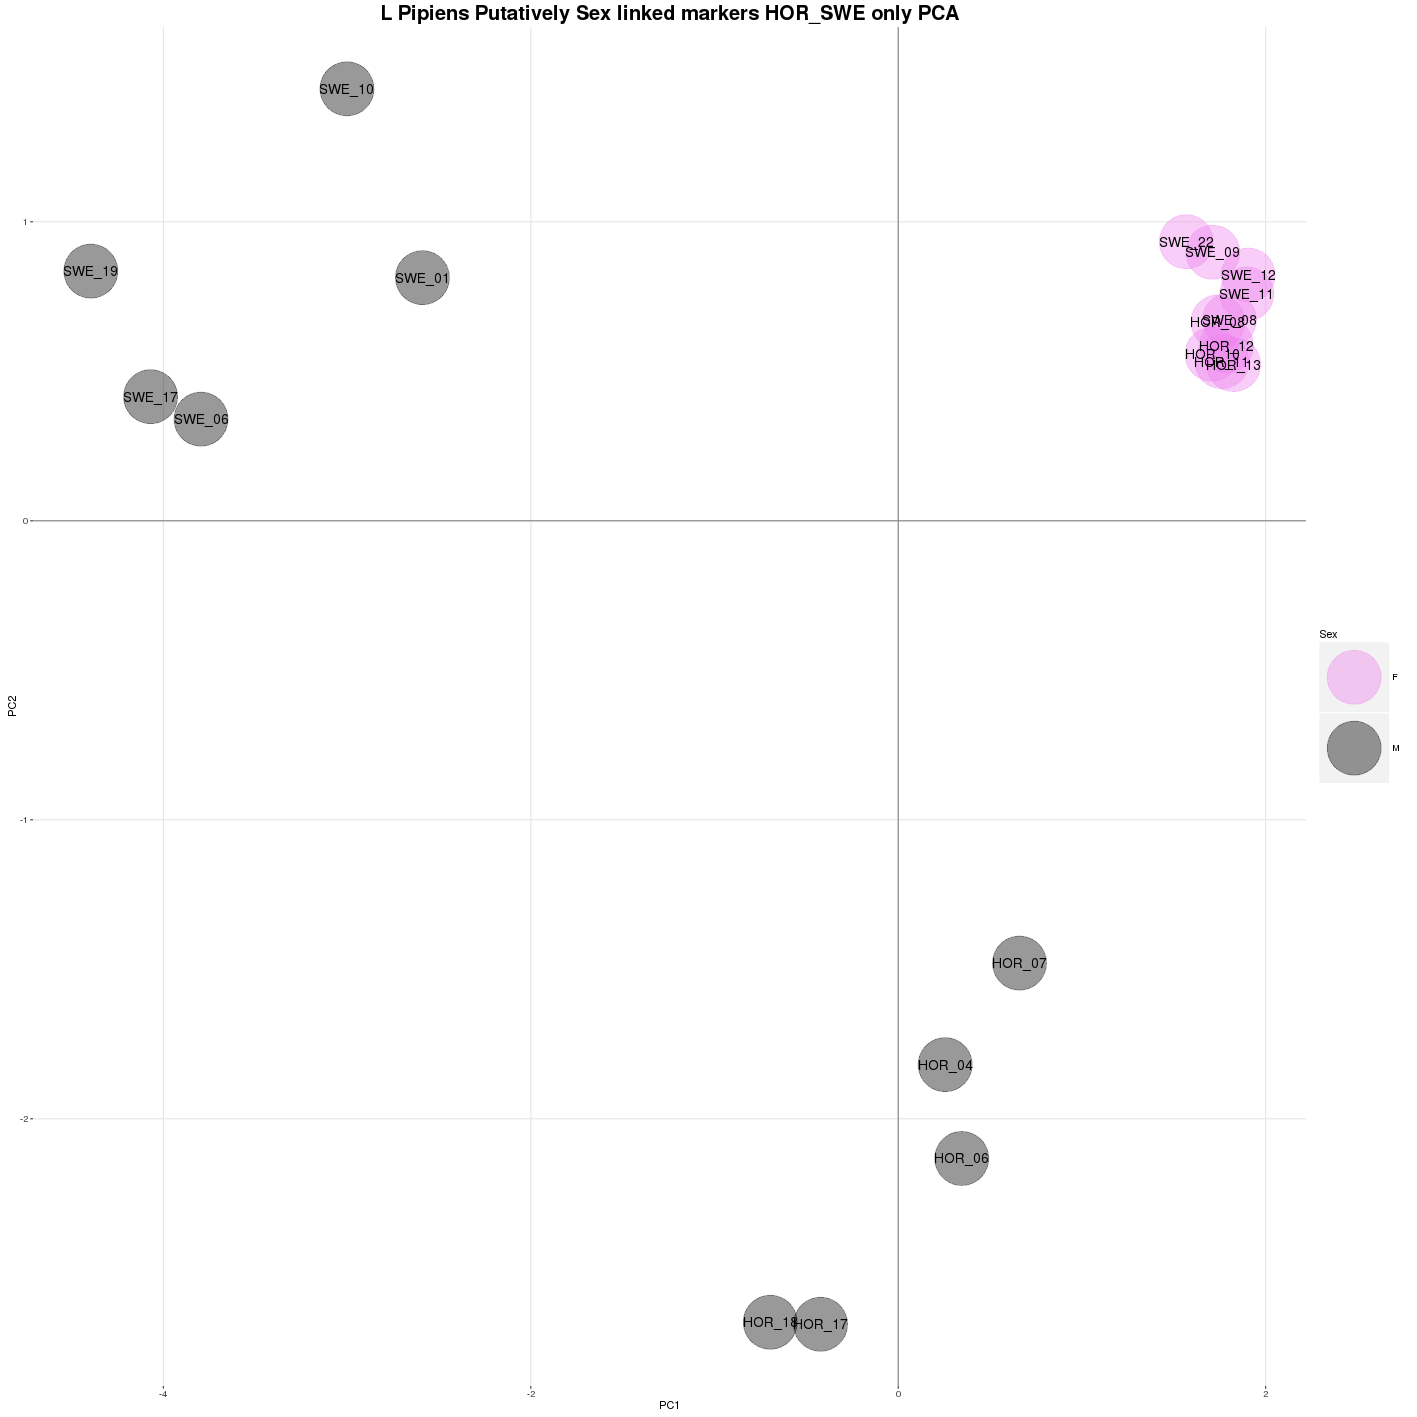

In [70]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca2,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "L Pipiens Putatively Sex linked markers HOR_SWE only PCA", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

Reassuring that the "X chromosomes" i.e. females cluster tightly, as would be expected with recomb. And not surprising that there are different haplotypes for the HOR and SWE pops. 

In [71]:
%%bash
sh /home/djeffrie/Dropbox/My_Dropbox_Scripts/Bash/Make_heatmap_input.sh  /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/HOR_SWE_populations/XY_linked_snps_freq_het_altered_adegenet.raw  /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/HOR_SWE_populations/XY_linked_snps_freq_het_altered_adegenet

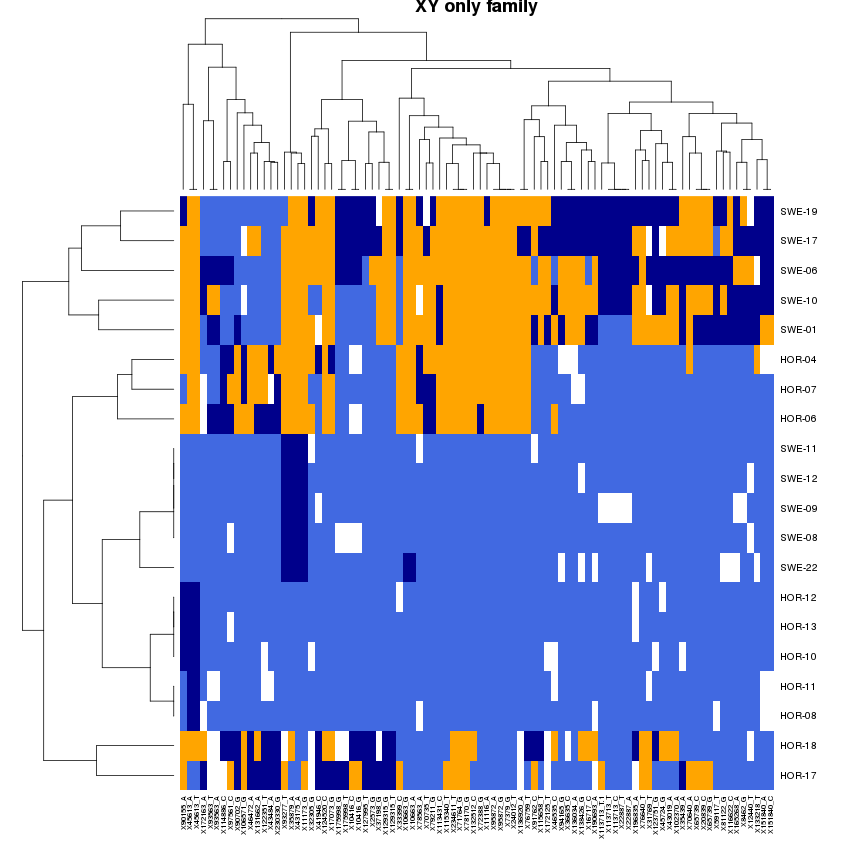

In [72]:
%%R -w 30 -h 30 -u cm

XY_heatmap_data <- read.delim("/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/HOR_SWE_populations/XY_linked_snps_freq_het_altered_adegenet.raw", row.names = 1)
XY_heatmap_data_sorted <- XY_heatmap_data[order(row.names(XY_heatmap_data), decreasing = T), ]
XY_heatmap_data_datmat <- as.matrix(XY_heatmap_data_sorted)

heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "XY only family")


So, still a bit messy. There are clearly some loci that are sex linked in the majority of both HOR and SWE, but HOR18 and 17 are a bit weird. 

Nevertheless, I am confident that these are indeed sex linked loci. . . 


### Can check the other lineage to see if these loci are sex linked there or not. . . 

In [73]:
vcf_path = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Eastern_lineage_populations/batch_1.vcf"

MISC.filter_vcf(vcf_path, XYset , "XY_linked_western_lin_snps_freq_het.vcf")

In [75]:
%%bash

wd=/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Eastern_lineage_populations/  ## just change this line

## XY only data 
sed 's/_/-/g' $wd/XY_linked_western_lin_snps_freq_het.vcf > $wd/XY_linked_western_lin_snps_freq_het_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/XY_linked_western_lin_snps_freq_het_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/XY_linked_western_lin_snps_freq_het_altered_adegenet

PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Eastern_lineage_populations//XY_linked_western_lin_snps_freq_het_altered_adegenet.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Eastern_lineage_populations//XY_linked_western_lin_snps_freq_het_altered_adegenet
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Eastern_lineage_populations//XY_linked_western_lin_snps_freq_het_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Eastern_lineage_populations//XY_linked_western_lin_snps_freq_het_altered_adegenet-temporary.bed
+
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Eastern_lineage_populations//XY_linked_western_lin_snps_freq_het_altered_adegene

In [76]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Eastern_lineage_populations/") 

## All SNPs (about 80,000)
XYdata <- read.PLINK('XY_linked_western_lin_snps_freq_het_altered_adegenet.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("Sex_ID_info_Eastern_kept_certain.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca2 <- glPca(XYdata, parallel = TRUE, n.cores = 2, nf = 5) 



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



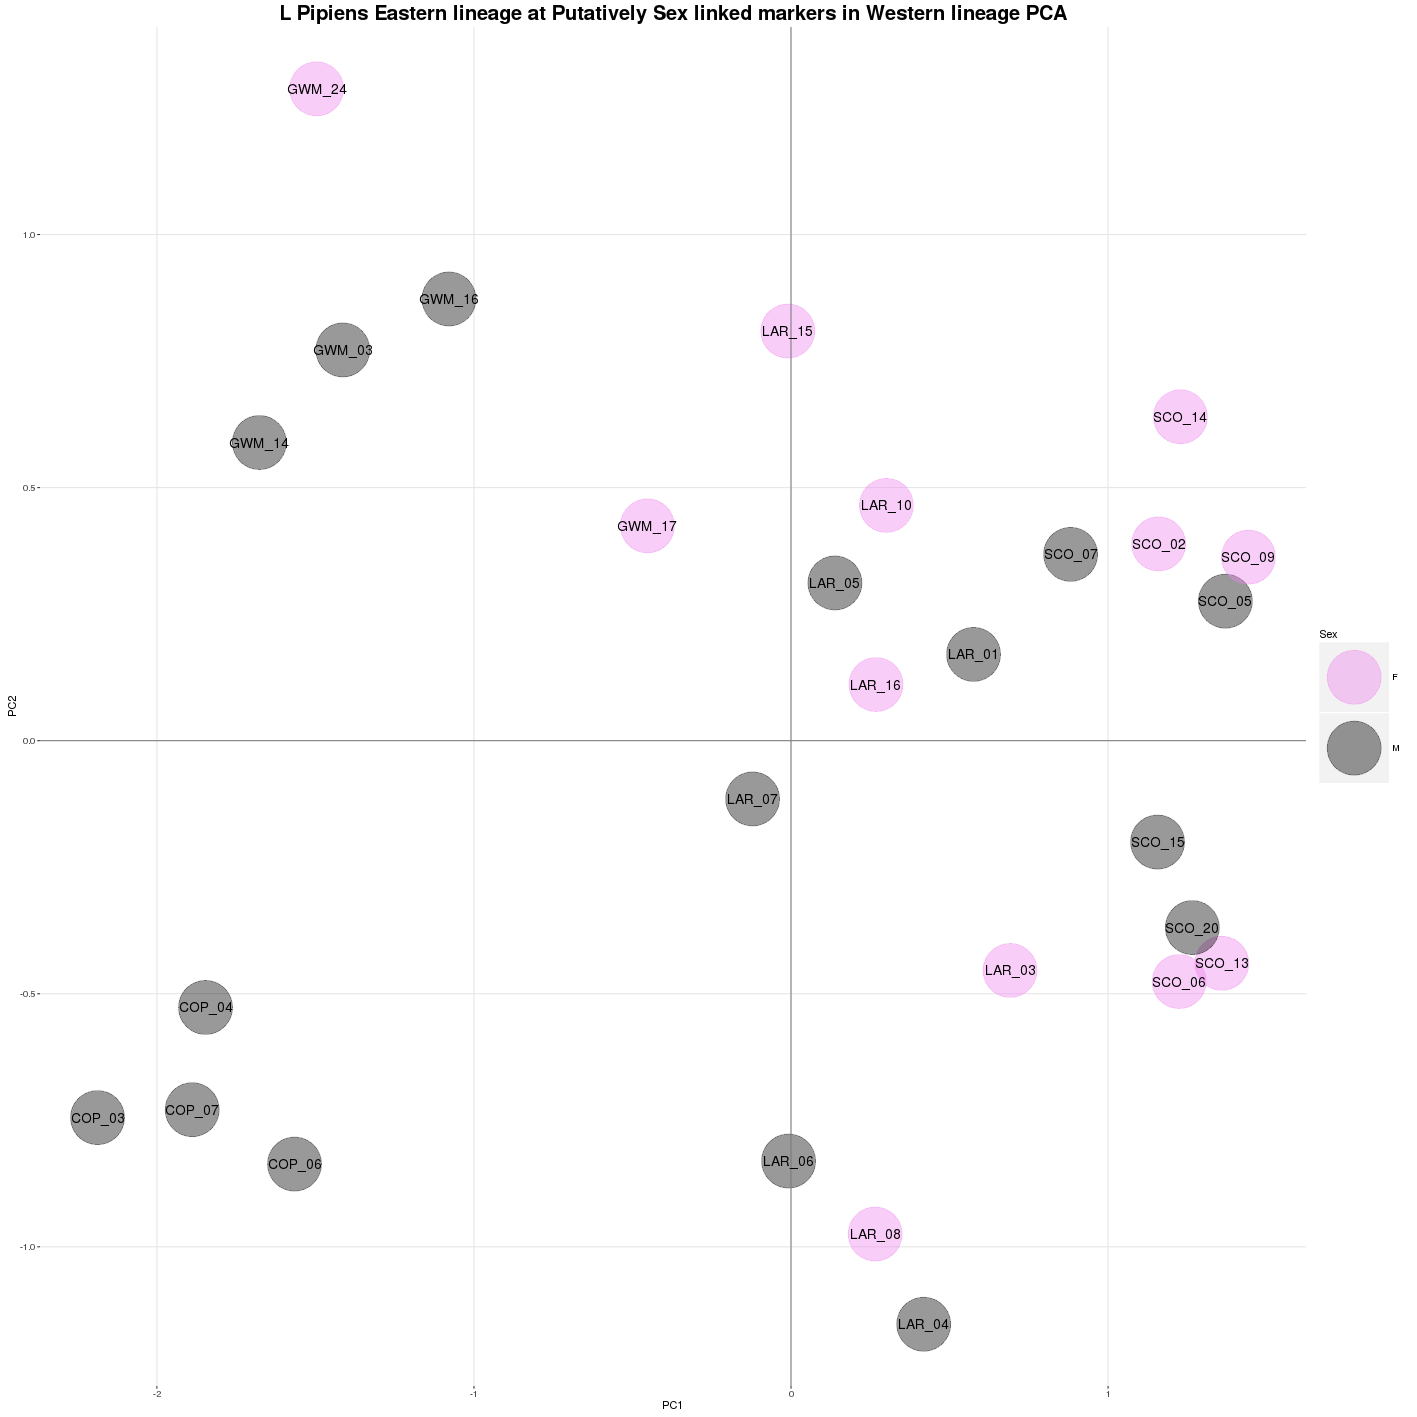

In [77]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca2,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "L Pipiens Eastern lineage at Putatively Sex linked markers in Western lineage PCA", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

### So the answer is no, the signal is mostly phylogeographic. 

What about the rest of the western populations - A PCA should show me if there is any male/female signal in any of those populations at these loci. . . 

In [79]:
%%bash

wd=/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations/  ## just change this line

## XY only data 
sed 's/_/-/g' $wd/XY_linked_western_lin_snps_freq_het.vcf > $wd/XY_linked_western_lin_snps_freq_het_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/XY_linked_western_lin_snps_freq_het_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/XY_linked_western_lin_snps_freq_het_altered_adegenet

PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations//XY_linked_western_lin_snps_freq_het_altered_adegenet.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations//XY_linked_western_lin_snps_freq_het_altered_adegenet
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations//XY_linked_western_lin_snps_freq_het_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations//XY_linked_western_lin_snps_freq_het_altered_adegenet-temporary.bed
+
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations//XY_linked_western_lin_snps_freq_het_altered_adegene

In [82]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations/") 

## All SNPs (about 80,000)
XYdata <- read.PLINK('XY_linked_western_lin_snps_freq_het_altered_adegenet.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("Sex_ID_info_western_kept_certain.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca2 <- glPca(XYdata, parallel = TRUE, n.cores = 2, nf = 5) 



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



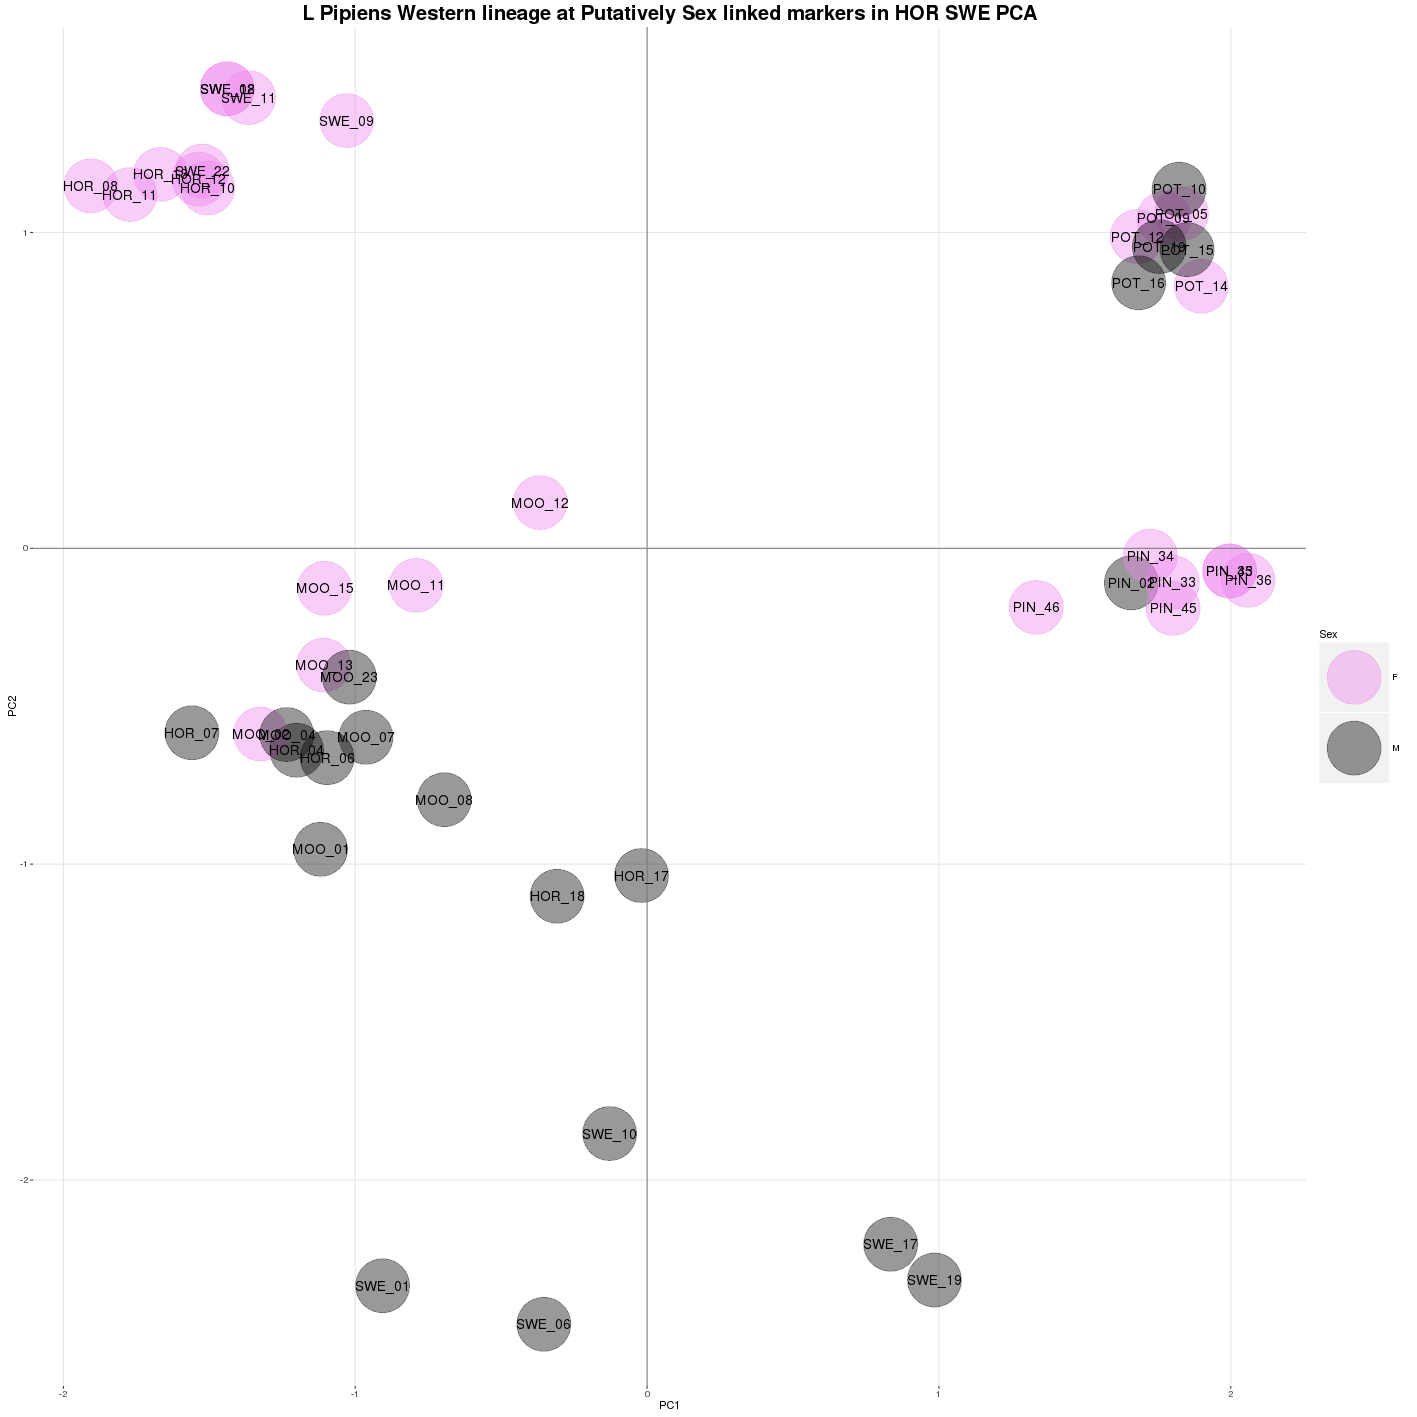

In [86]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca2,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "L Pipiens Western lineage at Putatively Sex linked markers in HOR SWE PCA", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

### Still no, so I think this is as much as I'm going to get out of this dataset as it is. 

I can maybe include the "Unsure samples now, I can sex them bioinformatically to give more power. But this is only going to be useful for SWE and HOR, and probably only worth it if I find that I can't map enough of the loci I already have. 

so . . .

### SUMMARY

Out of the 12 populations, from 2 lineages, I can only confidently identify SL loci in 2 populations, possibly 3, which corresponds to the "Western lineage" as described in the paper these samples come from. 

So I found 112 putative XY loci, with pretty strict conditions. And had 28 false positives, almost all of which came from the "freq" approach, known to be sensitive to false positives with low sample numbers. 



In [1]:
from Bio.Blast.Applications import NcbiblastnCommandline
import MISC_RAD_tools as MISC
import shutil

Rtemp_fasta = "/home/djeffrie/Data/Genomes/Rtemp/V2/Rtemp_gapfilled_iter2_flted2.fa"
Rtemp_db = "/home/djeffrie/Data/Genomes/Rtemp/V2/Rtemp_gapfilled_iter2_flted2-blastn-db"

Nano_fasta = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Nanorana_blast_db/Nanorana_parkeri.genome.v2.fasta"
Nanorana_db = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Nanorana_blast_db/Nanorana_blast_db"

Xen_db = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xenoupus_blastdb"
Xen_fasta = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xtropicalis.v9.repeatMasked.fa"


best_hit_crit = 1e-5
Eval_threshold = 1e-20
Window = 8000

wd = "/home/djeffrie/Data/Mapping_SL_tags_to_genomes/Sex_linked_tags/Manual_mapping/L_pipiens/"
prefix = "L_pip"

### Tags to Rtemp

print "\n##  Mapping tags to R. temporaria  ##\n"

tags ="%s/%s" % (wd, "L_pipiens_HOR_SWE.fa")
tags_to_Rtemp_blastnouts = "%s/%s" % (wd, "%s_%s" % (prefix, "tags_Rtemp_blastnouts.xml"))

blastn_cline = NcbiblastnCommandline(query=tags, db=Rtemp_db, outfmt=5, out=tags_to_Rtemp_blastnouts)
stdout, stderr = blastn_cline()

Rtemp_records = MISC.BlastParseExtra(tags_to_Rtemp_blastnouts, Rtemp_fasta , best_hit_crit, Eval_threshold,Window)

Rtemp_blast_chunks = "%s/%s" % (wd,  "%s_%s" % (prefix, "Rtemp_8k_chunks.fa"))

shutil.move("%s/%s" % (wd,"blast_8000_chunks.fa"), Rtemp_blast_chunks)


### Rtemp chunks to Nanorana

print "\n##  Mapping Rtemp chunks Nanorana  ##\n"

tags_Rtemp_Nano_blastnouts = "%s/%s" % (wd, "%s_%s" % (prefix, "Rtemp_Nano_blastnouts.xml"))

blastn_cline = NcbiblastnCommandline(query=Rtemp_blast_chunks, db=Nanorana_db, outfmt=5, out=tags_Rtemp_Nano_blastnouts)
stdout, stderr = blastn_cline()

Nano_records = MISC.BlastParseExtra(tags_Rtemp_Nano_blastnouts, Nano_fasta , best_hit_crit, Eval_threshold,Window)

Rtemp_Nano_blast_chunks = "%s/%s" % (wd,"%s_%s" % (prefix, "Rtemp_Nano_8k_chunks.fa"))

shutil.move("%s/%s" % (wd,"blast_8000_chunks.fa"), Rtemp_Nano_blast_chunks)



### Nanorana chunks to Xenopus

print "\n##  Mapping Nanorana chunks Xenopus  ##\n"

tags_Rtemp_Nano_Xen_blastnouts = "%s/%s" % (wd, "%s_%s" % (prefix, "Rtemp_Nano_Xen_blastnouts.xml"))

blastn_cline = NcbiblastnCommandline(query=Rtemp_Nano_blast_chunks, db=Xen_db, outfmt=5, out=tags_Rtemp_Nano_Xen_blastnouts)
stdout, stderr = blastn_cline()

Xen_records = MISC.BlastParseExtra(tags_Rtemp_Nano_Xen_blastnouts, Xen_fasta , best_hit_crit, Eval_threshold,Window)

Xen_chunks = "%s/%s" % (wd,"%s_%s" % (prefix, "Rtemp_Nano_Xen_8kb_chunks.fa"))
                                      
shutil.move("%s/%s" % (wd,"blast_8000_chunks.fa"), Xen_chunks)



### Get the Xenopus summary

print "\n##  Final Xenopus hits  ##\n"

from collections import Counter 
Xen_hits = []
for i in Xen_records:
    Xen_hits.append(Xen_records[i]["Ref_hit_id"])
    print i, Xen_records[i]["Ref_hit_id"]


##  Mapping tags to R. temporaria  ##

Number of multi-alingments kept: 2
Number of unique alingments kept: 9
Getting subject scaffold segments from /home/djeffrie/Data/Genomes/Rtemp/V2/Rtemp_gapfilled_iter2_flted2.fa . . . 
11 sequence scaffold segments are in /home/djeffrie/Data/Mapping_SL_tags_to_genomes/Sex_linked_tags/Manual_mapping/L_pipiens//blast_8000_chunks.fa

##  Mapping Rtemp chunks Nanorana  ##

Number of multi-alingments kept: 8
Number of unique alingments kept: 0
Getting subject scaffold segments from /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Nanorana_blast_db/Nanorana_parkeri.genome.v2.fasta . . . 
7 sequence scaffold segments are in /home/djeffrie/Data/Mapping_SL_tags_to_genomes/Sex_linked_tags/Manual_mapping/L_pipiens//blast_8000_chunks.fa

##  Mapping Nanorana chunks Xenopus  ##

Number of multi-alingments kept: 0
Number of unique alingments kept: 0
Getting subject scaffold segments from /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenop

In [8]:
from Bio.Blast.Applications import NcbiblastnCommandline
import MISC_RAD_tools as MISC
import shutil


L_pip = "/home/djeffrie/Data/Genomes/Rana_pipiens_transcriptome_Christenson_2014/Rpipiens_full_transcriptome_v001.fasta"
L_pip_db = "/home/djeffrie/Data/Genomes/Rana_pipiens_transcriptome_Christenson_2014/R_pip_trans_blastn"

best_hit_crit = 1e-5
Eval_threshold = 1e-10
Window = 2000

wd = "/home/djeffrie/Data/Mapping_SL_tags_to_genomes/Sex_linked_tags/Manual_mapping/L_pipiens/"
prefix = "L_pip"

### Tags to Rtemp

print "\n##  Mapping tags to L pip transcriptome  ##\n"

tags ="%s/%s" % (wd, "L_pipiens_HOR_SWE.fa")
blastnouts = "%s/%s" % (wd, "%s_%s" % (prefix, "tags_Rclam_trans_blastnouts.xml"))

blastn_cline = NcbiblastnCommandline(query=tags, db=L_pip_db, outfmt=5, out=blastnouts)
stdout, stderr = blastn_cline()

records = MISC.BlastParseExtra(blastnouts, L_pip , best_hit_crit, Eval_threshold,Window)

Rtemp_blast_chunks = "%s/%s" % (wd,  "%s_%s" % (prefix, "Rpip_trans_2k_chunks.fa"))

shutil.move("%s/%s" % (wd,"blast_2000_chunks.fa"), Rtemp_blast_chunks)




##  Mapping tags to L pip transcriptome  ##

Number of multi-alingments kept: 2
Number of unique alingments kept: 3
Getting subject scaffold segments from /home/djeffrie/Data/Genomes/Rana_pipiens_transcriptome_Christenson_2014/Rpipiens_full_transcriptome_v001.fasta . . . 
3 sequence scaffold segments are in /home/djeffrie/Data/Mapping_SL_tags_to_genomes/Sex_linked_tags/Manual_mapping/L_pipiens//blast_2000_chunks.fa


In [9]:
records

{u'X_linkedLocusID_22887_2128452_Xlinked_freq': {'Evalue': 4.32576e-18,
  'Hit_end_coord': 527,
  'Hit_start_coord': 591,
  'Ref_hit_id': 'Rana_pipiens_Transcript_517316'},
 u'X_linkedLocusID_22887_2128468_Xlinked_freq': {'Evalue': 4.32576e-18,
  'Hit_end_coord': 527,
  'Hit_start_coord': 591,
  'Ref_hit_id': 'Rana_pipiens_Transcript_517316'},
 u'X_linkedLocusID_283526_Ylinked_tags': {'Evalue': 9.29762e-20,
  'Hit_end_coord': 137,
  'Hit_start_coord': 195,
  'Ref_hit_id': 'Rana_pipiens_Transcript_495810'},
 u'X_linkedLocusID_45613_4241994_Xlinked_het': {'Evalue': 9.36363e-15,
  'Hit_end_coord': 167,
  'Hit_start_coord': 217,
  'Ref_hit_id': 'Rana_pipiens_Transcript_504220'},
 u'X_linkedLocusID_45613_4242009_Xlinked_het': {'Evalue': 9.36363e-15,
  'Hit_end_coord': 167,
  'Hit_start_coord': 217,
  'Ref_hit_id': 'Rana_pipiens_Transcript_504220'}}

## Per population analyses

### POT

In [62]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/POT_populations/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/POT_populations/POT_Sex_ID_info.txt"

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.7 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.


In [63]:
POT_XYset, POT_ZWset = MISC.Super_SLM_finder(Parameter_dict, "010")


##### Using SNP heterozygosity approach #####
 
Number of loci = 6607
Number of samples = 9
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 6606
Number of putative X linked snps = 133
Number of putative X linked tags = 133
Number of putative Z linked markers = 23
Number of putative Z linked tags = 23

 ### DONE! ### 

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks

 ## After merging tags accross methods ## 

Final number of XY tags = 133
Final number of ZW tags = 23


In [70]:
vcf_path = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/POT_populations/batch_1.vcf"

MISC.filter_vcf(vcf_path, POT_XYset , "POT_XY_linked_het.vcf")

In [71]:
%%bash

wd=/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/POT_populations/  ## just change this line

## XY only data 
sed 's/_/-/g' $wd/POT_XY_linked_het.vcf > $wd/POT_XY_linked_het_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/POT_XY_linked_het_adegenet.vcf --recode A --allow-extra-chr -out $wd/POT_XY_linked_het_adegenet

PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/POT_populations//POT_XY_linked_het_adegenet.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/POT_populations//POT_XY_linked_het_adegenet
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/POT_populations//POT_XY_linked_het_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/POT_populations//POT_XY_linked_het_adegenet-temporary.bed
+
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/POT_populations//POT_XY_linked_het_adegenet-temporary.bim
+
/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/POT_populations//POT_XY_linked_het_adegenet-temporary.fam
written.
133 variants loaded from .bim file.
9 people (0 males

In [80]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.R")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/POT_populations/") 

## All SNPs (about 80,000)
XYdata <- read.PLINK('POT_XY_linked_het_adegenet.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("POT_Sex_ID_info.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca2 <- glPca(XYdata, parallel = TRUE, n.cores = 2, nf = 5) 



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



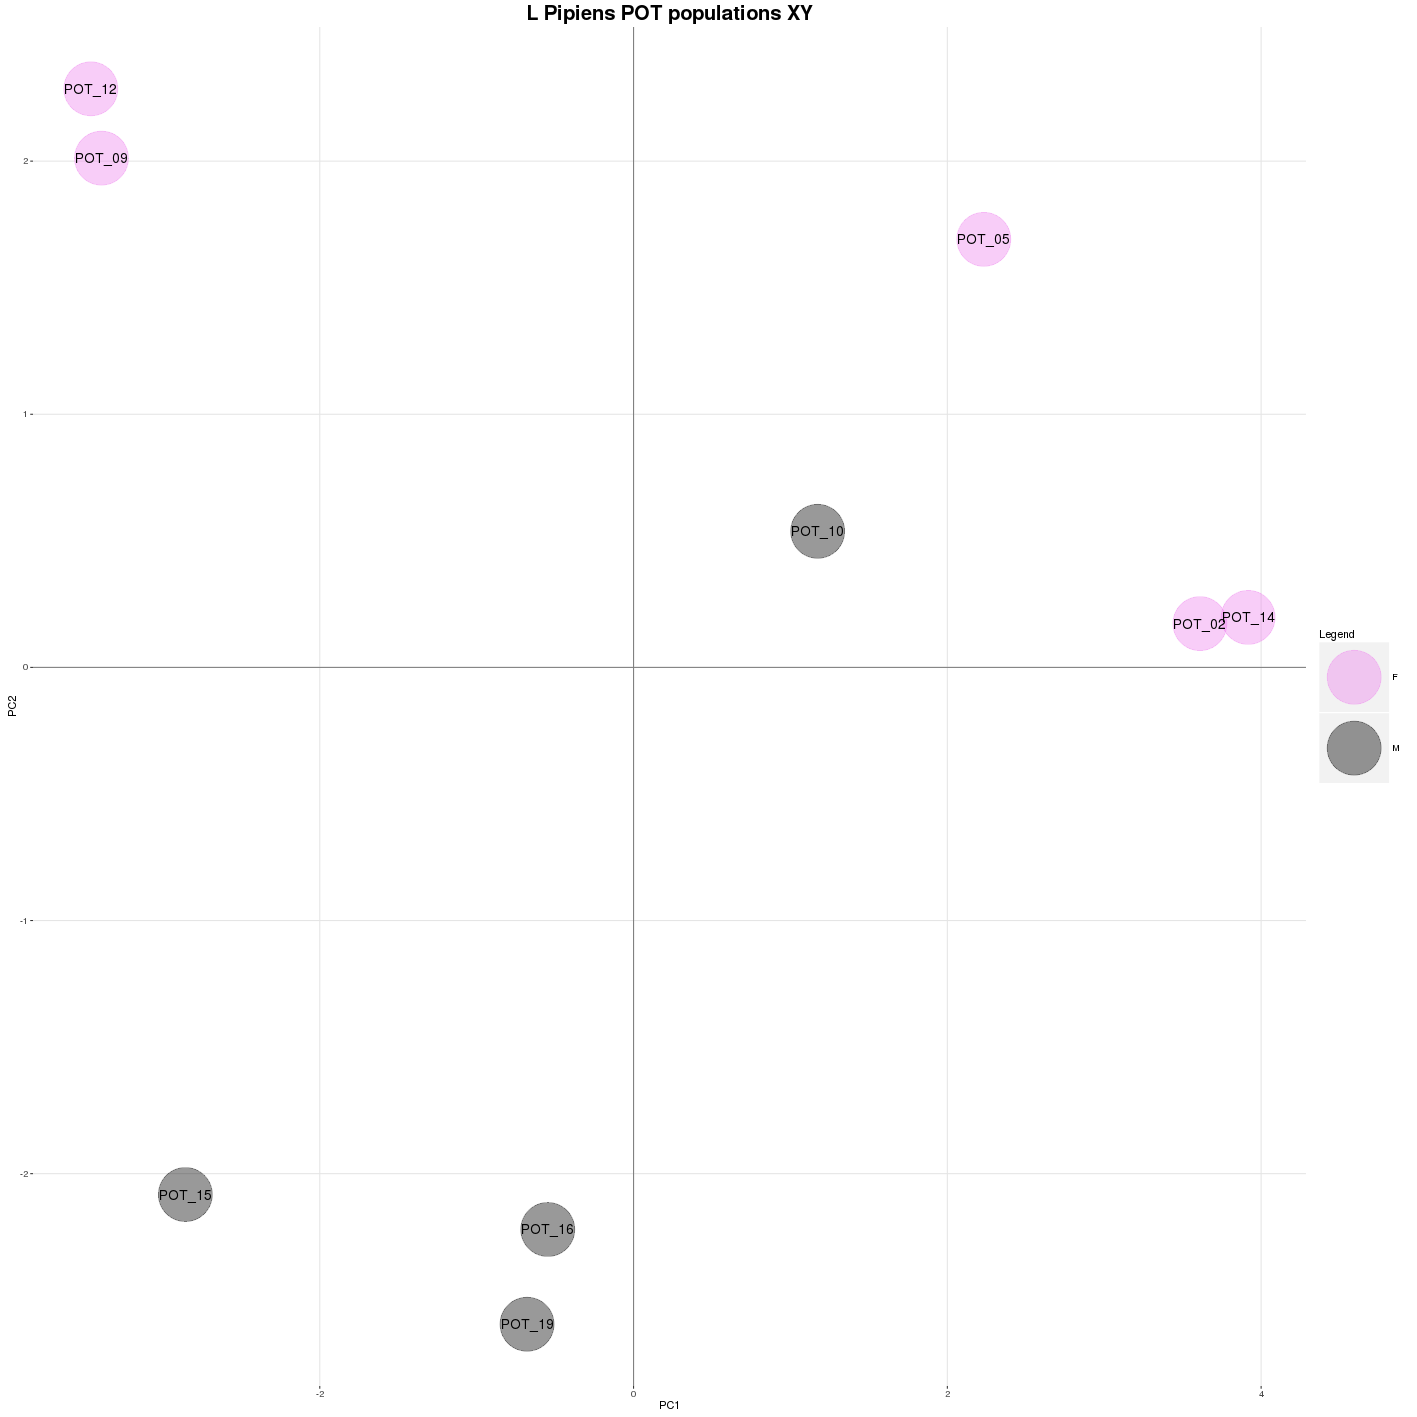

In [81]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.
sexes <- read.delim("POT_Sex_ID_info.txt", header = F)
Sex_sorter(pca2,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "L Pipiens POT populations XY", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black", "green"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

### SWE

In [111]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/SWE_populations/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/SWE_populations/SWE_sex_ID_info.txt"

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 1 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.


In [112]:
SWE_XYset, SWE_ZWset = MISC.Super_SLM_finder(Parameter_dict, "010")


##### Using SNP heterozygosity approach #####
 
Number of loci = 21740
Number of samples = 10
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 21739
Number of putative X linked snps = 223
Number of putative X linked tags = 223
Number of putative Z linked markers = 14
Number of putative Z linked tags = 14

 ### DONE! ### 

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks

 ## After merging tags accross methods ## 

Final number of XY tags = 223
Final number of ZW tags = 14


## HOR

In [97]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/HOR_populations/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/HOR_populations/HOR_sex_ID_info.txt"

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 1 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.


In [98]:
HOR_XYset, HOR_ZWset = MISC.Super_SLM_finder(Parameter_dict, "010")


##### Using SNP heterozygosity approach #####
 
Number of loci = 24396
Number of samples = 10
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 24395
Number of putative X linked snps = 63
Number of putative X linked tags = 63
Number of putative Z linked markers = 67
Number of putative Z linked tags = 67

 ### DONE! ### 

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks

 ## After merging tags accross methods ## 

Final number of XY tags = 63
Final number of ZW tags = 67


## MOO

In [101]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/MOO_populations/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/MOO_populations/MOO_sex_ID_info.txt"

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 1 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.


In [102]:
MOO_XYset, MOO_ZWset = MISC.Super_SLM_finder(Parameter_dict, "010")


##### Using SNP heterozygosity approach #####
 
Number of loci = 32789
Number of samples = 10
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 32788
Number of putative X linked snps = 6
Number of putative X linked tags = 6
Number of putative Z linked markers = 8
Number of putative Z linked tags = 8

 ### DONE! ### 

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks

 ## After merging tags accross methods ## 

Final number of XY tags = 6
Final number of ZW tags = 8


## TIF

In [105]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/TIF_populations/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/TIF_populations/TIF_sex_ID_info.txt"

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 1 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.


In [106]:
TIF_XYset, TIF_ZWset = MISC.Super_SLM_finder(Parameter_dict, "010")


##### Using SNP heterozygosity approach #####
 
Number of loci = 45182
Number of samples = 10
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 45181
Number of putative X linked snps = 36
Number of putative X linked tags = 36
Number of putative Z linked markers = 3
Number of putative Z linked tags = 3

 ### DONE! ### 

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks

 ## After merging tags accross methods ## 

Final number of XY tags = 36
Final number of ZW tags = 3


In [113]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/LAR_populations/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/LAR_populations/LAR_sex_ID_info.txt"

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.8 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.


In [114]:
LAR_XYset, LAR_ZWset = MISC.Super_SLM_finder(Parameter_dict, "010")


##### Using SNP heterozygosity approach #####
 
Number of loci = 39486
Number of samples = 10
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 39485
Number of putative X linked snps = 156
Number of putative X linked tags = 156
Number of putative Z linked markers = 107
Number of putative Z linked tags = 107

 ### DONE! ### 

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks

 ## After merging tags accross methods ## 

Final number of XY tags = 156
Final number of ZW tags = 107
